In [1]:
# https://www.kaggle.com/code/yasnunsal/uk-traffic-accidents-eda/input
# The datasets can't be uploaded to github due to file size limit. The above link is the reference of the dataset used for this task.

# Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import folium
from statsmodels.tsa.seasonal import seasonal_decompose

# Load Data and Initial Step

In [2]:
accidents_2005_to_2007 = pd.read_csv('accidents_2005_to_2007.csv')
accidents_2009_to_2011 = pd.read_csv('accidents_2009_to_2011.csv')
accidents_2012_to_2014 = pd.read_csv('accidents_2012_to_2014.csv')

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\1955588172.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_2005_to_2007 = pd.read_csv('accidents_2005_to_2007.csv')
C:\Users\athar\AppData\Local\Temp\ipykernel_8784\1955588172.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_2012_to_2014 = pd.read_csv('accidents_2012_to_2014.csv')


In [3]:
accidents_data = pd.concat([accidents_2005_to_2007, accidents_2009_to_2011, accidents_2012_to_2014], ignore_index=True)

In [4]:
accidents_data.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties      Date  ...  \
0                     1  04-01-05  ...   
1                     1  05-01-05  ...   
2                     1  06-01-05  ...   
3                     1  07-01-05  ...   
4                     1  10-01-05  ...   

       Pedestrian_Crossing-Physical_Facilities  \
0                               Zebra crossing   
1  Pedestrian phase at traffic signal junction   
2        No physical crossing within 50 meters   
3        No physical crossing within 50 meters   
4        No physical crossing within 50 meters   

                          Light_Conditions          Weather_Conditions  \
0           Daylight: Street light present  Raining without high winds   
1  Darkness: Street lights present and lit     Fine without high winds   
2  Darkness: Street lights present and lit     Fine without high winds   
3           Daylight: Street light present     Fine without high winds   
4        Darkness: Street lighting unknown     Fine without high winds   

  Road_Surface_Conditions  Special_Conditions_at_Site  Carriageway_Hazards  \
0                Wet/Damp                         NaN                  NaN   
1                     Dry                         NaN                  NaN   
2                     Dry                         NaN                  NaN   
3                     Dry                         NaN                  NaN   
4                Wet/Damp                         NaN                  NaN   

  Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                   1                                          Yes   
1                   1                                          Yes   
2                   1                                          Yes   
3                   1                                          Yes   
4                   1                                          Yes   

  LSOA_of_Accident_Location  Year  
0                 E01002849  2005  
1                 E01002909  2005  
2                 E01002857  2005  
3                 E01002840  2005  
4                 E01002863  2005  

[5 rows x 32 columns]

In [5]:
accidents_data.tail()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
1504145       2.01E+12               310037.0                597647.0   
1504146       2.01E+12               321509.0                574063.0   
1504147       2.01E+12               321337.0                566365.0   
1504148       2.01E+12               323869.0                566853.0   
1504149       2.01E+12               314072.0                579971.0   

         Longitude   Latitude  Police_Force  Accident_Severity  \
1504145  -3.417278  55.264773            98                  2   
1504146  -3.230255  55.054855            98                  3   
1504147  -3.230826  54.985668            98                  3   
1504148  -3.191397  54.990446            98                  2   
1504149  -3.348426  55.106700            98                  3   

         Number_of_Vehicles  Number_of_Casualties      Date  ...  \
1504145                   2                     1  07-12-14  ...   
1504146                   2                     2  11-12-14  ...   
1504147                   1                     1  09-12-14  ...   
1504148                   3                     2  17-12-14  ...   
1504149                   2                     2  24-12-14  ...   

         Pedestrian_Crossing-Physical_Facilities  \
1504145    No physical crossing within 50 meters   
1504146    No physical crossing within 50 meters   
1504147    No physical crossing within 50 meters   
1504148    No physical crossing within 50 meters   
1504149    No physical crossing within 50 meters   

                                Light_Conditions          Weather_Conditions  \
1504145            Darkeness: No street lighting  Snowing without high winds   
1504146            Darkeness: No street lighting     Fine without high winds   
1504147  Darkness: Street lights present and lit     Fine without high winds   
1504148            Darkeness: No street lighting  Raining without high winds   
1504149           Daylight: Street light present     Fine without high winds   

        Road_Surface_Conditions  Special_Conditions_at_Site  \
1504145                    Snow                         NaN   
1504146                    Snow                         NaN   
1504147               Frost/Ice                         NaN   
1504148                Wet/Damp                         NaN   
1504149                Wet/Damp                         NaN   

         Carriageway_Hazards Urban_or_Rural_Area  \
1504145                  NaN                   2   
1504146                  NaN                   2   
1504147                  NaN                   2   
1504148                  NaN                   2   
1504149                  NaN                   2   

         Did_Police_Officer_Attend_Scene_of_Accident  \
1504145                                          Yes   
1504146                                          Yes   
1504147                                          Yes   
1504148                                          Yes   
1504149                                          Yes   

        LSOA_of_Accident_Location  Year  
1504145                       NaN  2014  
1504146                       NaN  2014  
1504147                       NaN  2014  
1504148                       NaN  2014  
1504149                       NaN  2014  

[5 rows x 32 columns]

In [6]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [7]:
accidents_data.describe()

Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           1.504049e+06            1.504049e+06  1.504049e+06   
mean            4.396214e+05            3.001584e+05 -1.436625e+00   
std             9.511616e+04            1.610084e+05  1.398078e+00   
min             6.495000e+04            1.029000e+04 -7.516225e+00   
25%             3.750600e+05            1.782600e+05 -2.373902e+00   
50%             4.399600e+05            2.688300e+05 -1.403714e+00   
75%             5.230600e+05            3.981510e+05 -2.215100e-01   
max             6.553700e+05            1.208800e+06  1.759398e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  1.504049e+06  1.504150e+06       1.504150e+06        1.504150e+06   
mean   5.258940e+01  3.020536e+01       2.838190e+00        1.831606e+00   
std    1.449889e+00  2.551603e+01       4.018423e-01        7.147586e-01   
min    4.991294e+01  1.000000e+00       1.000000e+00        1.000000e+00   
25%    5.149016e+01  6.000000e+00       3.000000e+00        1.000000e+00   
50%    5.230913e+01  3.000000e+01       3.000000e+00        2.000000e+00   
75%    5.347858e+01  4.500000e+01       3.000000e+00        2.000000e+00   
max    6.075754e+01  9.800000e+01       3.000000e+00        6.700000e+01   

       Number_of_Casualties   Day_of_Week  Local_Authority_(District)  \
count          1.504150e+06  1.504150e+06                1.504150e+06   
mean           1.350960e+00  4.118607e+00                3.476149e+02   
std            8.253345e-01  1.924405e+00                2.594292e+02   
min            1.000000e+00  1.000000e+00                1.000000e+00   
25%            1.000000e+00  2.000000e+00                1.100000e+02   
50%            1.000000e+00  4.000000e+00                3.220000e+02   
75%            1.000000e+00  6.000000e+00                5.180000e+02   
max            9.300000e+01  7.000000e+00                9.410000e+02   

       1st_Road_Class  1st_Road_Number   Speed_limit  2nd_Road_Class  \
count    1.504150e+06     1.504150e+06  1.504150e+06    1.504150e+06   
mean     4.087999e+00     1.009919e+03  3.900540e+01    2.675084e+00   
std      1.428936e+00     1.823518e+03  1.413993e+01    3.205539e+00   
min      1.000000e+00    -1.000000e+00  1.000000e+01   -1.000000e+00   
25%      3.000000e+00     0.000000e+00  3.000000e+01   -1.000000e+00   
50%      4.000000e+00     1.290000e+02  3.000000e+01    3.000000e+00   
75%      6.000000e+00     7.250000e+02  5.000000e+01    6.000000e+00   
max      6.000000e+00     9.999000e+03  7.000000e+01    6.000000e+00   

       2nd_Road_Number  Urban_or_Rural_Area          Year  
count     1.504150e+06         1.504150e+06  1.504150e+06  
mean      3.815684e+02         1.353871e+00  2.009370e+03  
std       1.302555e+03         4.783534e-01  3.013497e+00  
min      -1.000000e+00         1.000000e+00  2.005000e+03  
25%       0.000000e+00         1.000000e+00  2.006000e+03  
50%       0.000000e+00         1.000000e+00  2.010000e+03  
75%       0.000000e+00         2.000000e+00  2.012000e+03  
max       9.999000e+03         3.000000e+00  2.014000e+03

In [8]:
accidents_data.isnull()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0                 False                  False                   False   
1                 False                  False                   False   
2                 False                  False                   False   
3                 False                  False                   False   
4                 False                  False                   False   
...                 ...                    ...                     ...   
1504145           False                  False                   False   
1504146           False                  False                   False   
1504147           False                  False                   False   
1504148           False                  False                   False   
1504149           False                  False                   False   

         Longitude  Latitude  Police_Force  Accident_Severity  \
0            False     False         False              False   
1            False     False         False              False   
2            False     False         False              False   
3            False     False         False              False   
4            False     False         False              False   
...            ...       ...           ...                ...   
1504145      False     False         False              False   
1504146      False     False         False              False   
1504147      False     False         False              False   
1504148      False     False         False              False   
1504149      False     False         False              False   

         Number_of_Vehicles  Number_of_Casualties   Date  ...  \
0                     False                 False  False  ...   
1                     False                 False  False  ...   
2                     False                 False  False  ...   
3                     False                 False  False  ...   
4                     False                 False  False  ...   
...                     ...                   ...    ...  ...   
1504145               False                 False  False  ...   
1504146               False                 False  False  ...   
1504147               False                 False  False  ...   
1504148               False                 False  False  ...   
1504149               False                 False  False  ...   

         Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                          False             False   
1                                          False             False   
2                                          False             False   
3                                          False             False   
4                                          False             False   
...                                          ...               ...   
1504145                                    False             False   
1504146                                    False             False   
1504147                                    False             False   
1504148                                    False             False   
1504149                                    False             False   

         Weather_Conditions  Road_Surface_Conditions  \
0                     False                    False   
1                     False                    False   
2                     False                    False   
3                     False                    False   
4                     False                    False   
...                     ...                      ...   
1504145               False                    False   
1504146               False                    False   
1504147               False                    False   
1504148               False                    False   
1504149               False                    False   

         Special_Conditions_at_Site  Carriag

In [9]:
accidents_data.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_C

In [10]:
a,b,c = accidents_data.dtypes.reset_index(),accidents_data.isna().sum().reset_index(),accidents_data.describe().transpose().reset_index()
aa = pd.merge(a,b,on='index')

df_cols = pd.merge(aa,c,on='index').rename(columns =\
                   {'0_x':'Data_Type','0_y':'Null_Count'})
df_cols

index Data_Type  Null_Count      count  \
0        Location_Easting_OSGR   float64         101  1504049.0   
1       Location_Northing_OSGR   float64         101  1504049.0   
2                    Longitude   float64         101  1504049.0   
3                     Latitude   float64         101  1504049.0   
4                 Police_Force     int64           0  1504150.0   
5            Accident_Severity     int64           0  1504150.0   
6           Number_of_Vehicles     int64           0  1504150.0   
7         Number_of_Casualties     int64           0  1504150.0   
8                  Day_of_Week     int64           0  1504150.0   
9   Local_Authority_(District)     int64           0  1504150.0   
10              1st_Road_Class     int64           0  1504150.0   
11             1st_Road_Number     int64           0  1504150.0   
12                 Speed_limit     int64           0  1504150.0   
13              2nd_Road_Class     int64           0  1504150.0   
14             2nd_Road_Number     int64           0  1504150.0   
15         Urban_or_Rural_Area     int64           0  1504150.0   
16                        Year     int64           0  1504150.0   

             mean            std           min            25%            50%  \
0   439621.405078   95116.160326  64950.000000  375060.000000  439960.000000   
1   300158.403995  161008.382735  10290.000000  178260.000000  268830.000000   
2       -1.436625       1.398078     -7.516225      -2.373902      -1.403714   
3       52.589399       1.449889     49.912941      51.490156      52.309126   
4       30.205364      25.516033      1.000000       6.000000      30.000000   
5        2.838190       0.401842      1.000000       3.000000       3.000000   
6        1.831606       0.714759      1.000000       1.000000       2.000000   
7        1.350960       0.825335      1.000000       1.000000       1.000000   
8        4.118607       1.924405      1.000000       2.000000       4.000000   
9      347.614855     259.429163      1.000000     110.000000     322.000000   
10       4.087999       1.428936      1.000000       3.000000       4.000000   
11    1009.919075    1823.517696     -1.000000       0.000000     129.000000   
12      39.005398      14.139928     10.000000      30.000000      30.000000   
13       2.675084       3.205539     -1.000000      -1.000000       3.000000   
14     381.568351    1302.554552     -1.000000       0.000000       0.000000   
15       1.353871       0.478353      1.000000       1.000000       1.000000   
16    2009.369713       3.013497   2005.000000    2006.000000    2010.000000   

              75%           max  
0   523060.000000  6.553700e+05  
1   398151.000000  1.208800e+06  
2       -0.221510  1.759398e+00  
3       53.478581  6.075754e+01  
4       45.000000  9.800000e+01  
5        3.000000  3.000000e+00  
6        2.000000  6.700000e+01  
7        1.000000  9.300000e+01  
8        6.000000  7.000000e+00  
9      518.000000  9.410000e+02  
10       6.000000  6.000000e+00  
11     725.000000  9.999000e+03  
12      50.000000  7.000000e+01  
13       6.000000  6.000000e+00  
14       0.000000  9.999000e+03  
15       2.000000  3.000000e+00  
16    2012.000000  2.014000e+03

In [11]:
accidents_data.size

48132800

In [12]:
accidents_data.shape

(1504150, 32)

In [13]:
accidents_data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

# Data Cleaning and Preprocessing

In [14]:
missing_values = accidents_data.isnull().sum()

In [15]:
accidents_data = accidents_data.dropna(subset=['Latitude', 'Longitude'])

In [16]:
accidents_data['Date'] = pd.to_datetime(accidents_data['Date'], errors='coerce')

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\1908232553.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accidents_data['Date'] = pd.to_datetime(accidents_data['Date'], errors='coerce')


In [17]:
accidents_data['Year'] = accidents_data['Date'].dt.year
accidents_data['Month'] = accidents_data['Date'].dt.month
accidents_data['Day'] = accidents_data['Date'].dt.day
accidents_data['Hour'] = pd.to_datetime(accidents_data['Time'], format='%H:%M', errors='coerce').dt.hour

In [18]:
accidents_data.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties       Date  ...  Road_Surface_Conditions  \
0                     1 2005-04-01  ...                 Wet/Damp   
1                     1 2005-05-01  ...                      Dry   
2                     1 2005-06-01  ...                      Dry   
3                     1 2005-07-01  ...                      Dry   
4                     1 2005-10-01  ...                 Wet/Damp   

  Special_Conditions_at_Site  Carriageway_Hazards Urban_or_Rural_Area  \
0                        NaN                  NaN                   1   
1                        NaN                  NaN                   1   
2                        NaN                  NaN                   1   
3                        NaN                  NaN                   1   
4                        NaN                  NaN                   1   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  \
0                                          Yes                  E01002849   
1                                          Yes                  E01002909   
2                                          Yes                  E01002857   
3                                          Yes                  E01002840   
4                                          Yes                  E01002863   

   Year  Month Day  Hour  
0  2005      4   1  17.0  
1  2005      5   1  17.0  
2  2005      6   1   0.0  
3  2005      7   1  10.0  
4  2005     10   1  21.0  

[5 rows x 35 columns]

# Exploratory Data Analysis

In [19]:
accidents_data.Date.head()

0   2005-04-01
1   2005-05-01
2   2005-06-01
3   2005-07-01
4   2005-10-01
Name: Date, dtype: datetime64[ns]

In [20]:
accidents_data["Day"] = accidents_data.Date.apply(lambda x: str(x).split("-")[0]).values.astype("int64")
accidents_data["Month"] = accidents_data.Date.apply(lambda x: str(x).split("-")[1]).values.astype("int64")

In [21]:
months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

accidents_data.Month = accidents_data.Month.apply(lambda x: months[x])

In [22]:
accidents_data.loc[:,["Day", "Month"]].head()

Day Month
0  2005   Apr
1  2005   May
2  2005   Jun
3  2005   Jul
4  2005   Oct

In [23]:
days = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}

accidents_data.Day_of_Week = accidents_data.Day_of_Week.apply(lambda x: days[x])
accidents_data.Day_of_Week.head()

0    Wednesday
1     Thursday
2       Friday
3     Saturday
4      Tuesday
Name: Day_of_Week, dtype: object

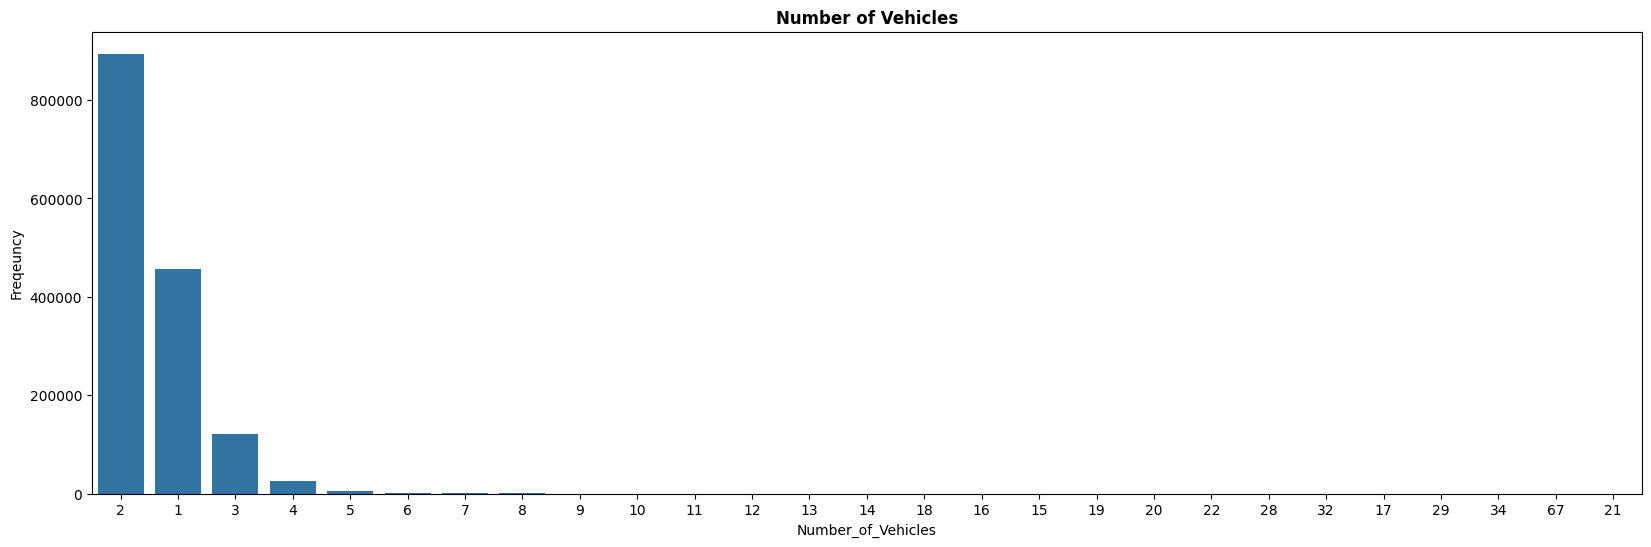

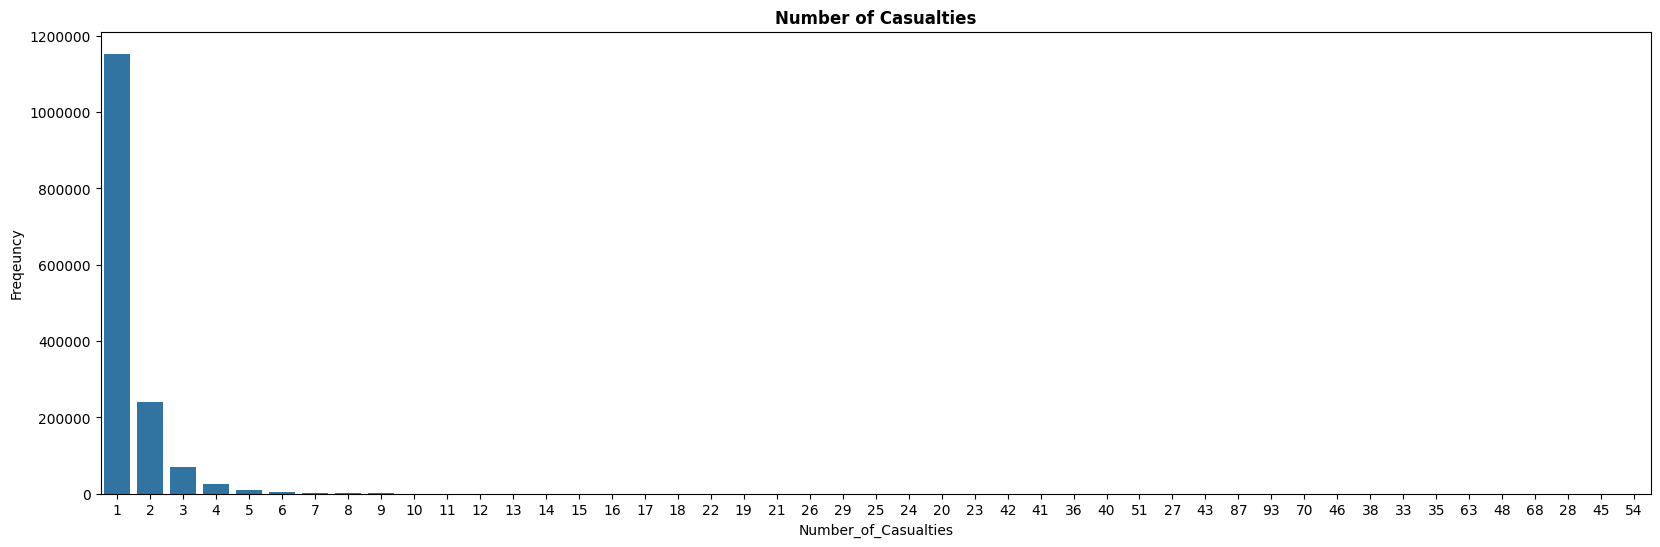

In [24]:
for column in ["Number_of_Vehicles", "Number_of_Casualties"]:
    var_value = accidents_data[column].value_counts()
    
    plt.figure(figsize=(20,6))
    
    plt.grid(False)
    sns.barplot(x=var_value.index, y=var_value, order=var_value.index)    
    
    plt.title(" ".join(column.split("_")), weight="bold")
    plt.ylabel("Freqeuncy")
    plt.ticklabel_format(style='plain', axis='y')

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\2855941679.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


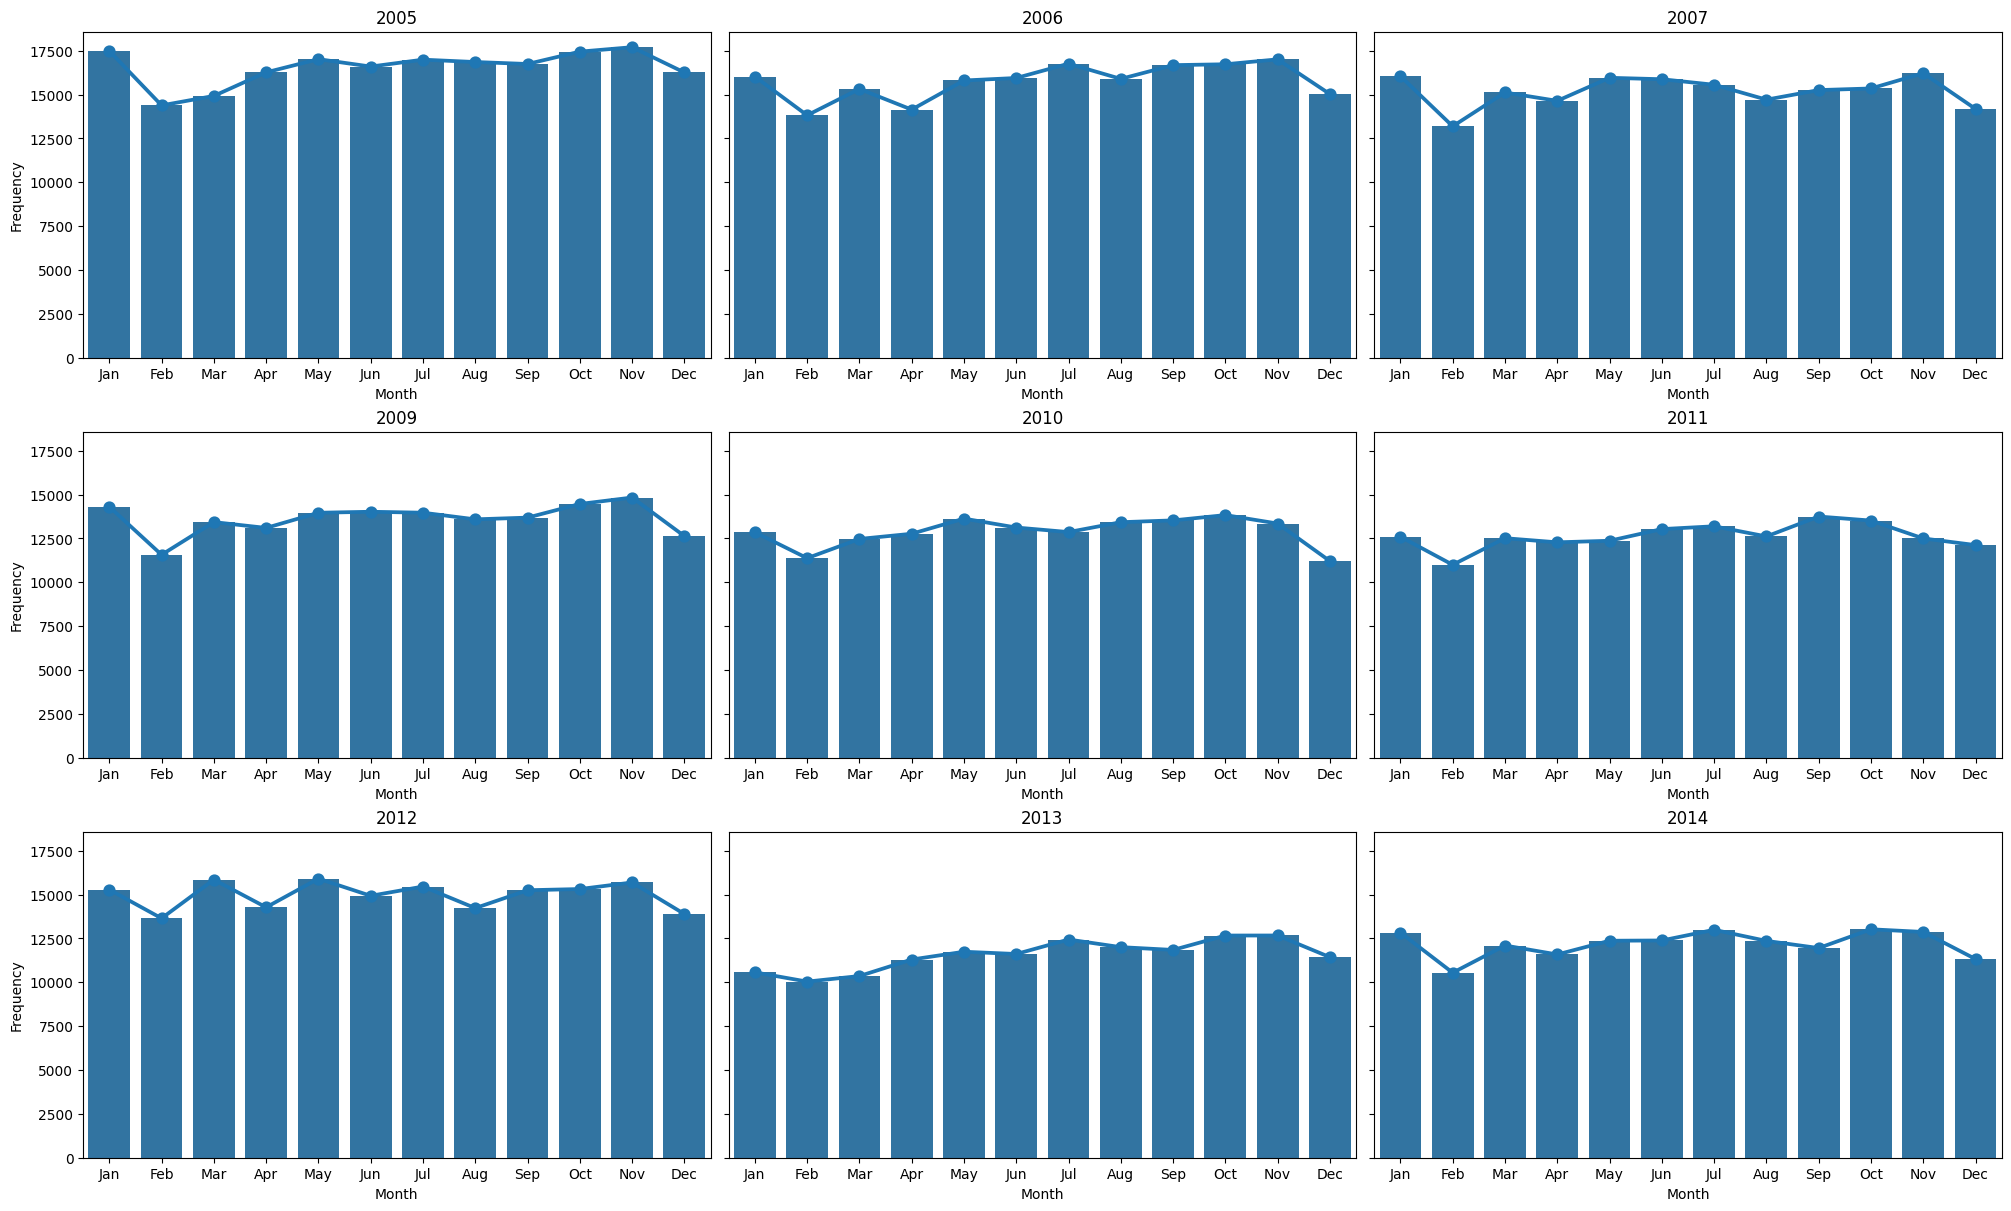

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(20,12), sharey=True, constrained_layout=True)

years = [2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014]

idx = 0
for row in range(3):
    for column in range(3):
        var_value = accidents_data.Month[accidents_data.Year == years[idx]].value_counts()
        
        ax[row][column].grid(False)
        sns.barplot(ax=ax[row][column], x=var_value.index, y=var_value, order=months.values())
        sns.pointplot(ax=ax[row][column], x=var_value.index, y=var_value, order=months.values())
        
        ax[row][column].set_ylabel("Frequency")
        ax[row][column].set_title(years[idx])
        
        idx += 1
fig.show()

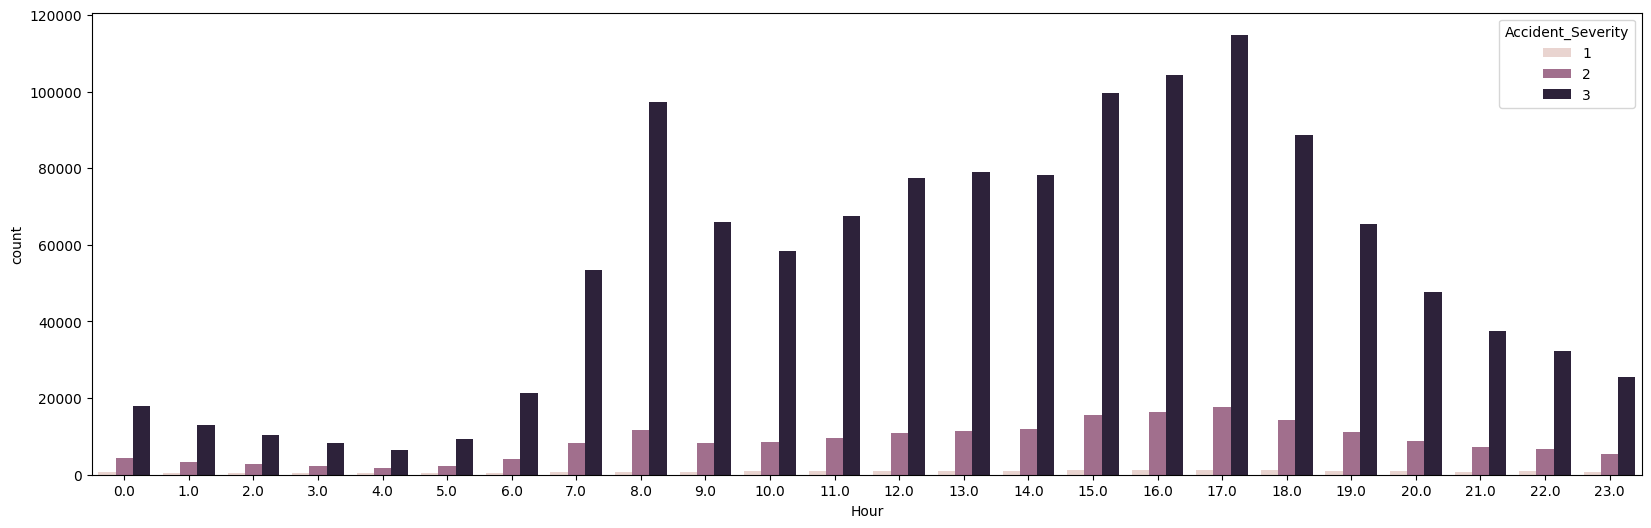

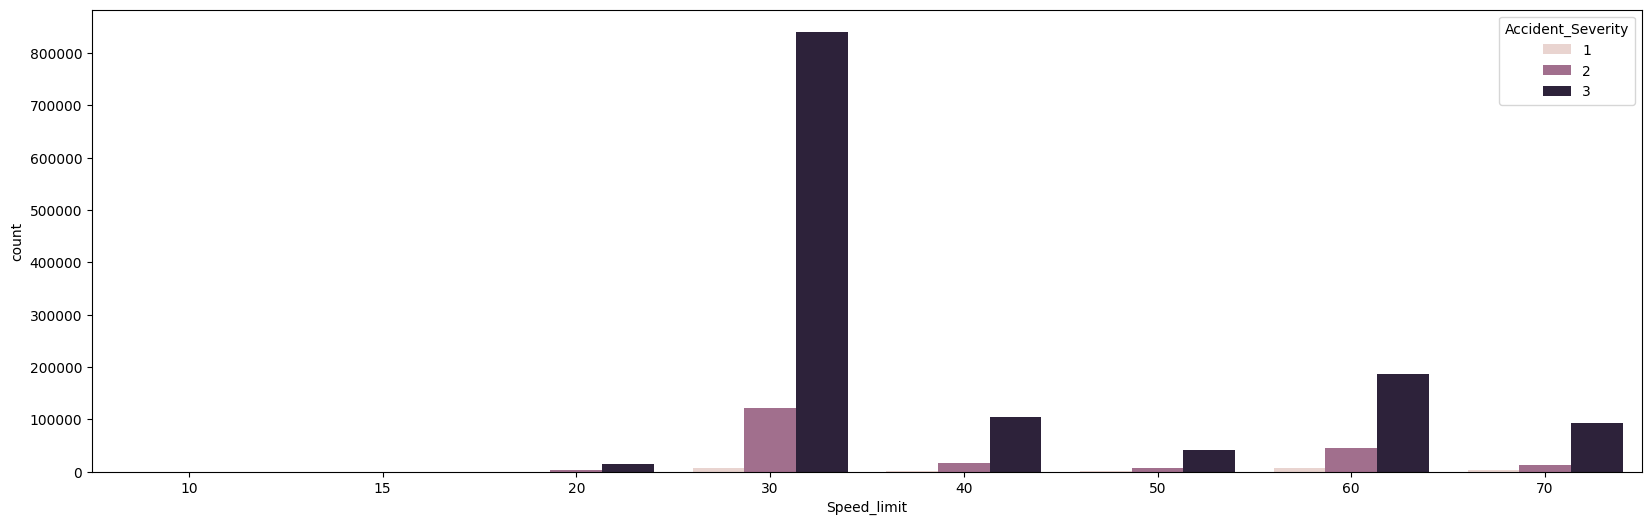

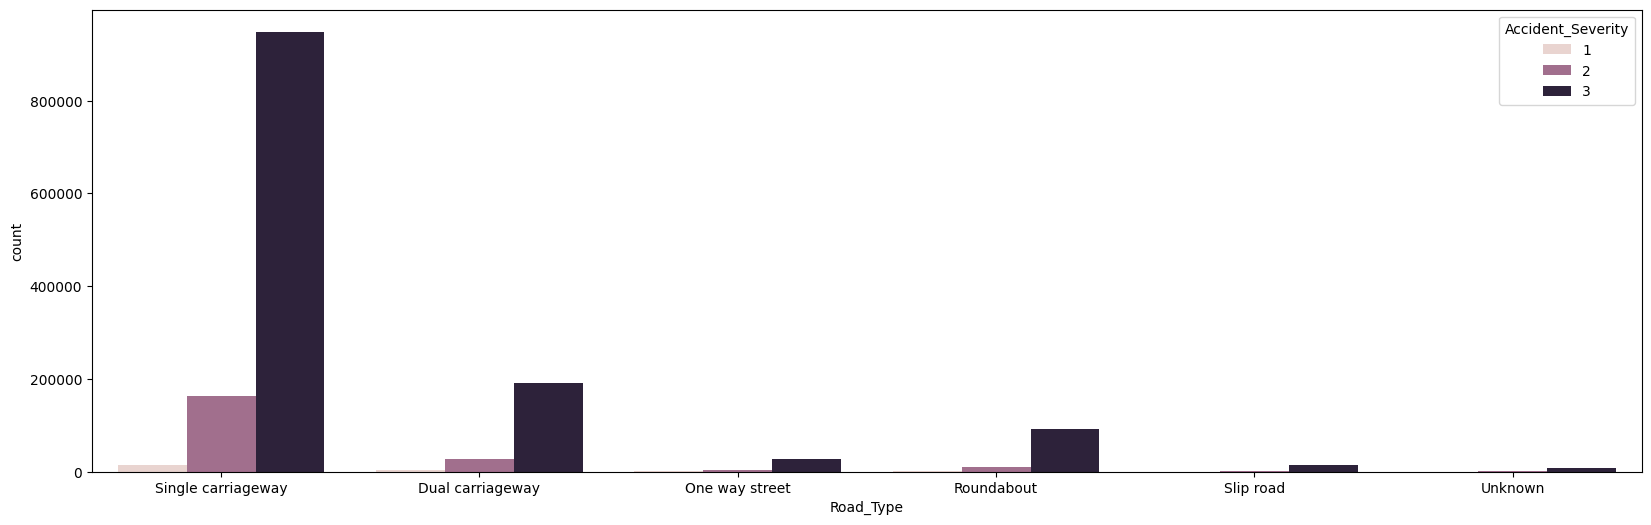

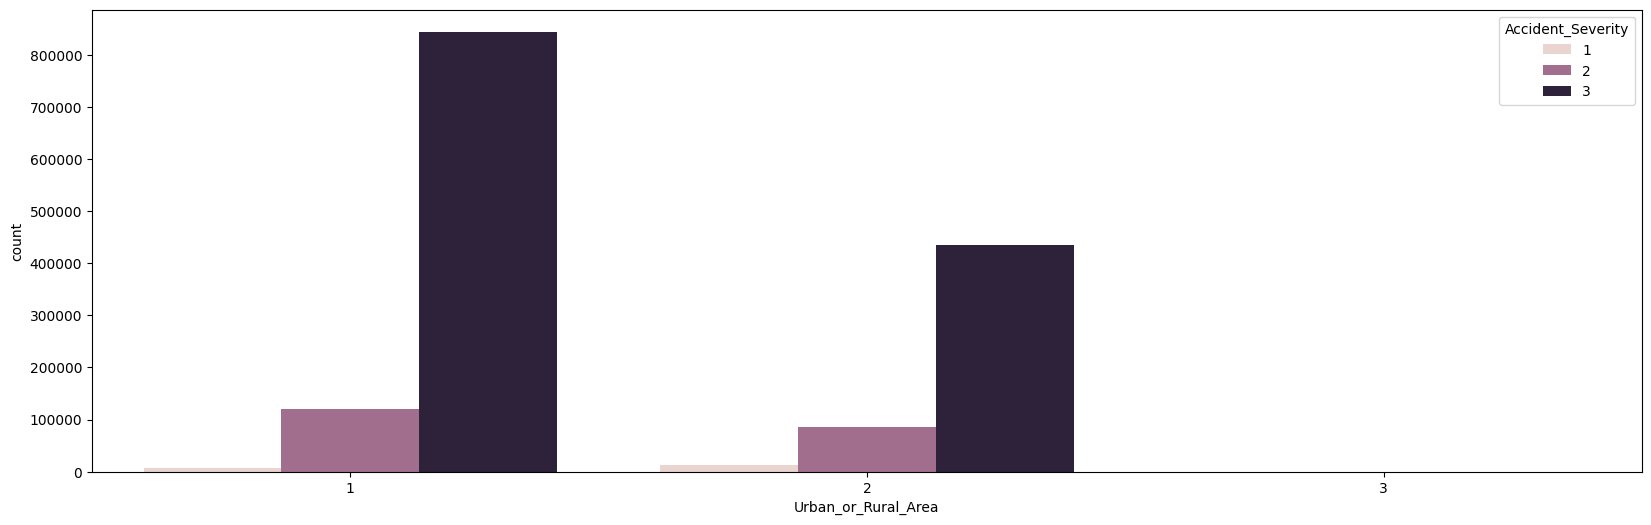

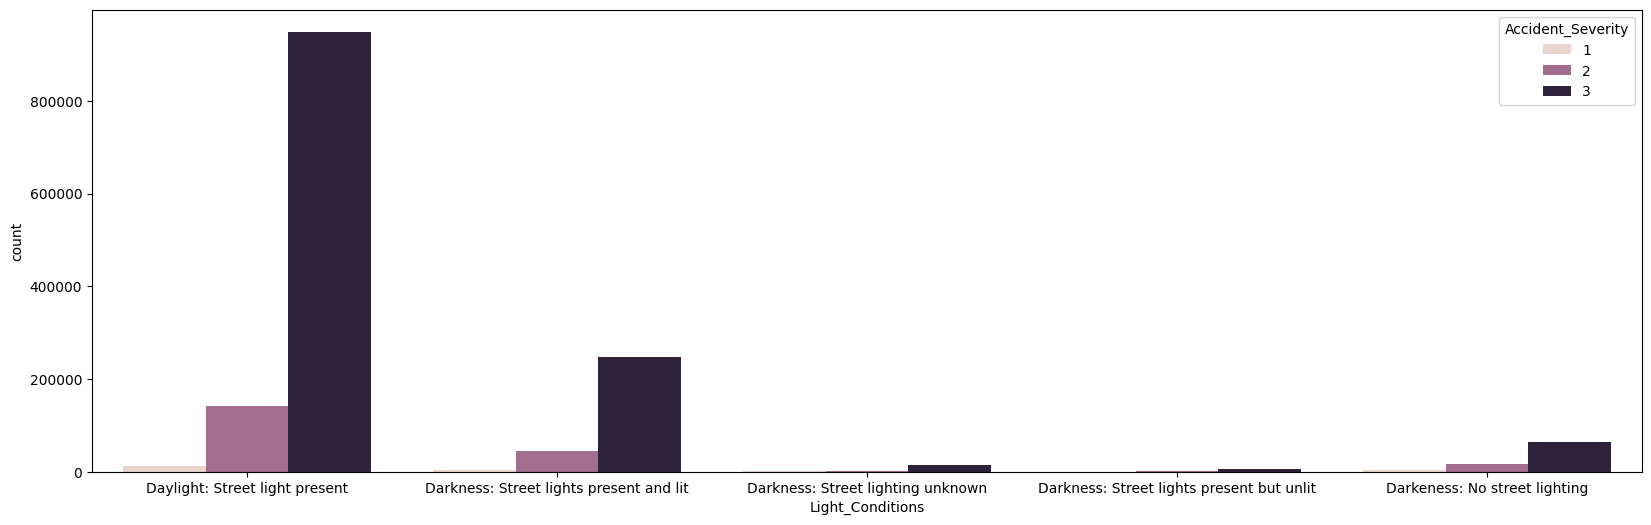

In [26]:
features = ["Hour", "Speed_limit", "Road_Type", "Urban_or_Rural_Area", "Light_Conditions"]

for feature in features:
    plt.figure(figsize=(20,6))
    
    sns.countplot(x=accidents_data[feature], hue="Accident_Severity", data=accidents_data)
    plt.grid(False)
    
    plt.xticks(rotation=0)

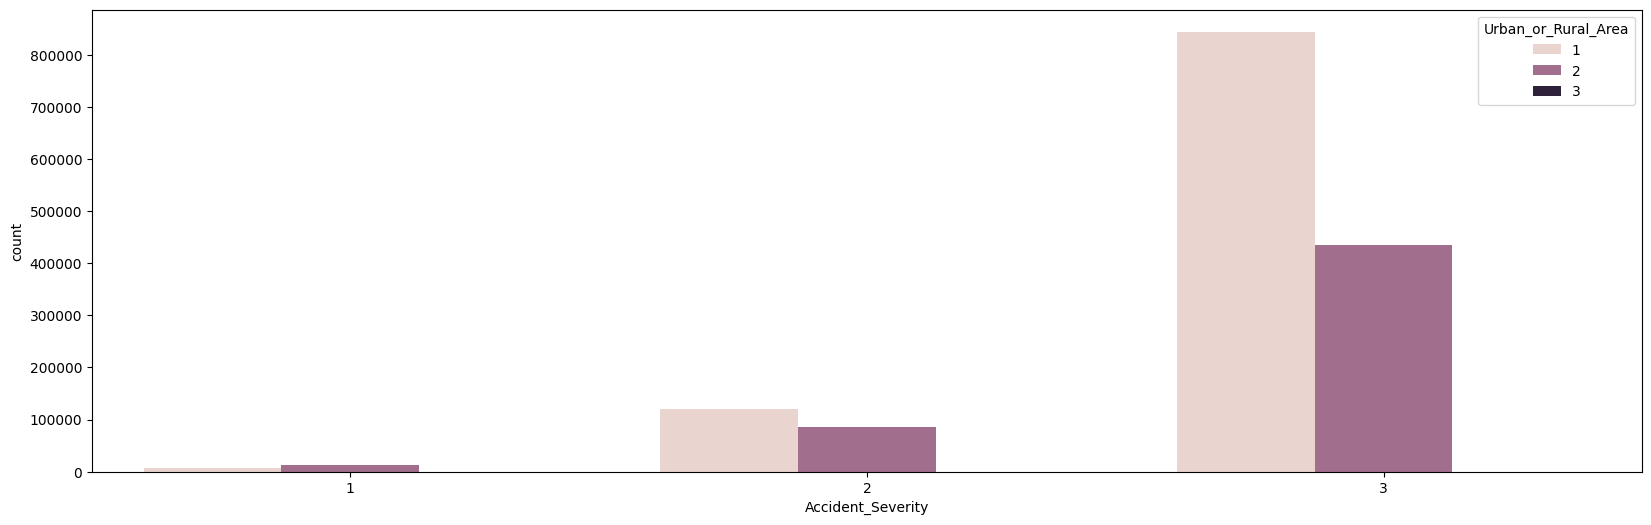

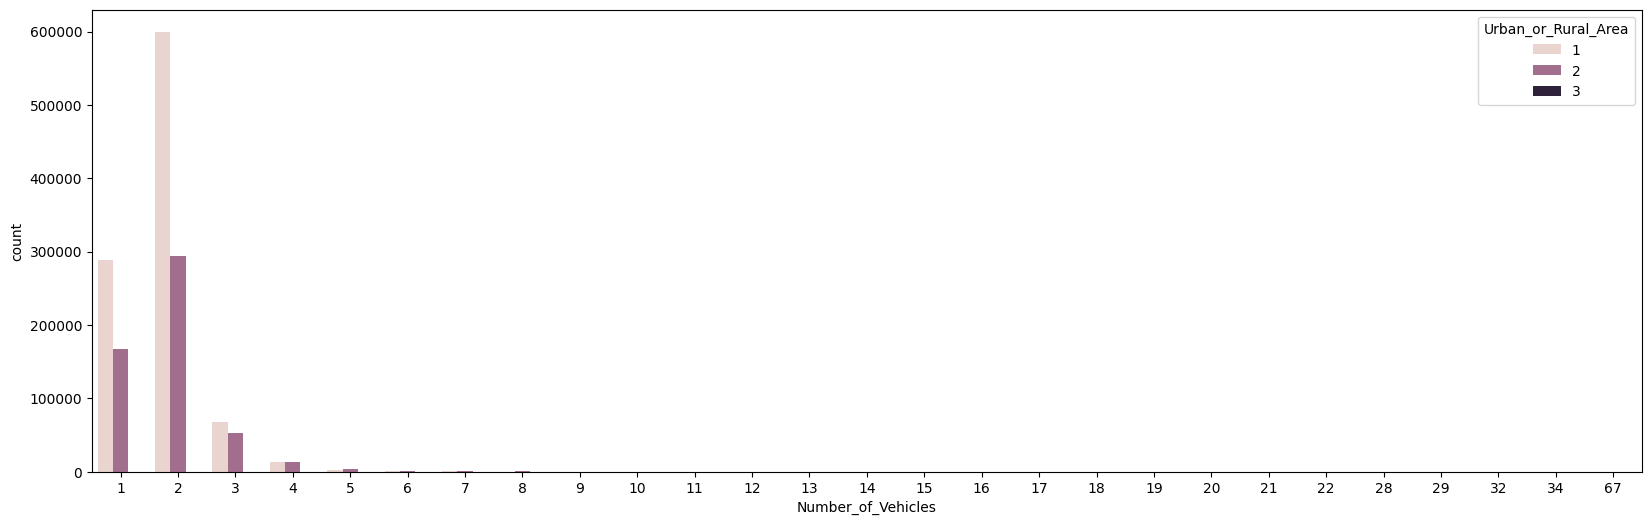

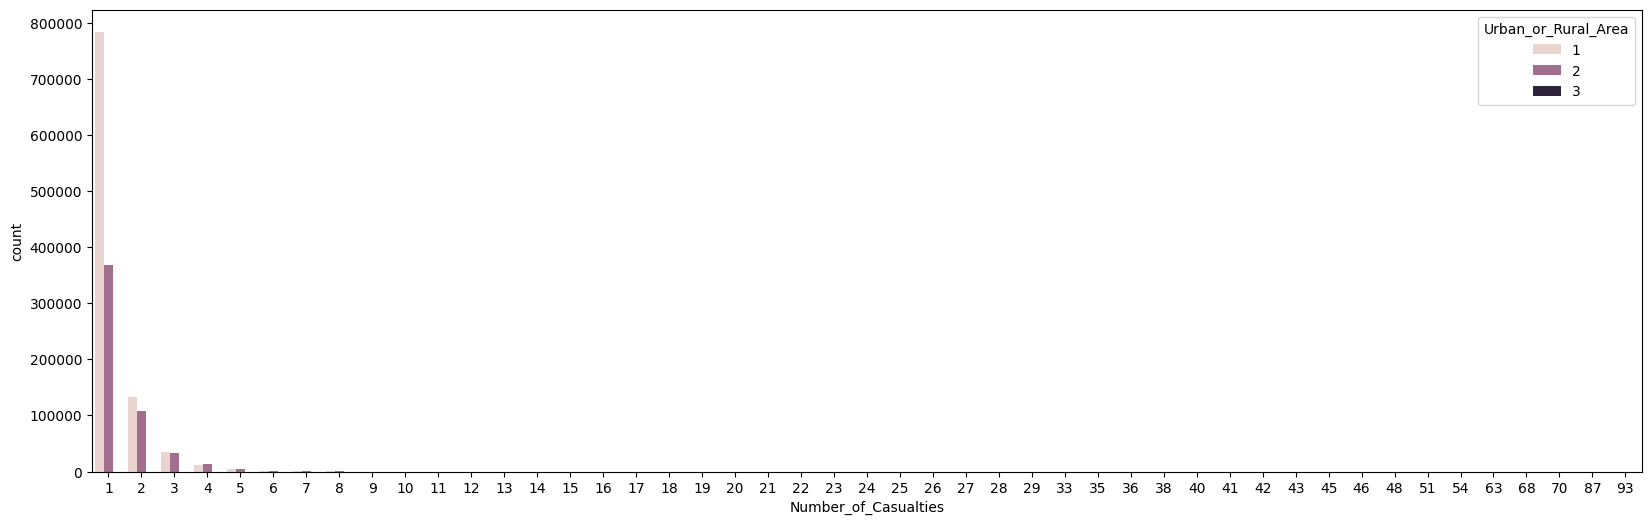

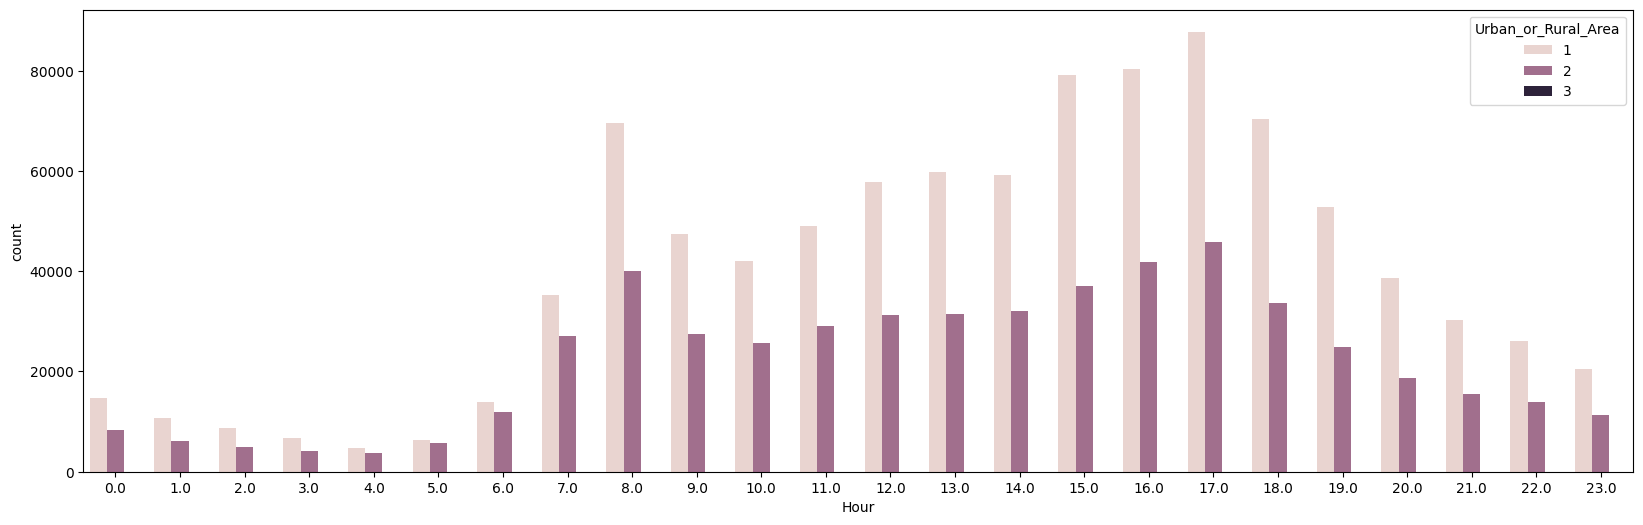

In [27]:
features = ["Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties", "Hour"]

for feature in features:
    plt.figure(figsize=(20,6))
    
    sns.countplot(x=accidents_data[feature], hue="Urban_or_Rural_Area", data=accidents_data)
    plt.grid(False)
    
    plt.xticks(rotation=0)

# Analyze Time-Based Patterns (Accidents by Hour)

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\3017327104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=accidents_data, palette='coolwarm')


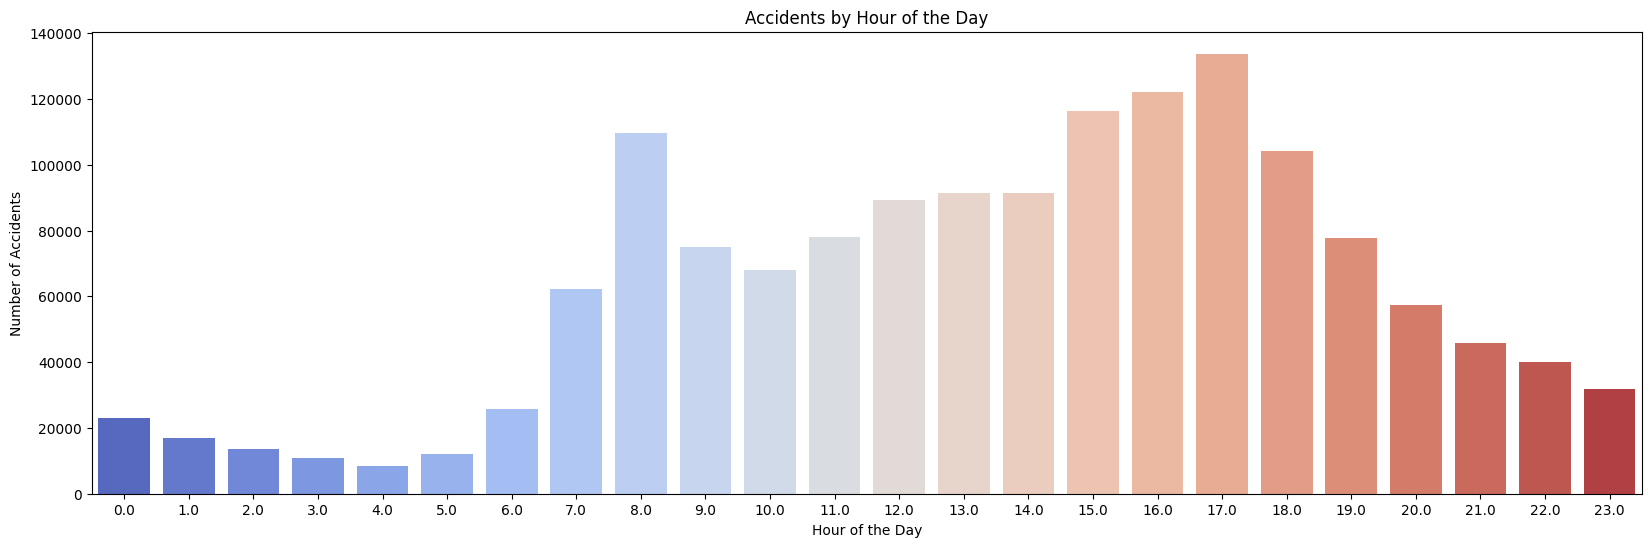

In [28]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Hour', data=accidents_data, palette='coolwarm')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

# Analyze Road Conditions and Weather Patern

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\3696307321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Road_Surface_Conditions', data=accidents_data, palette='viridis')


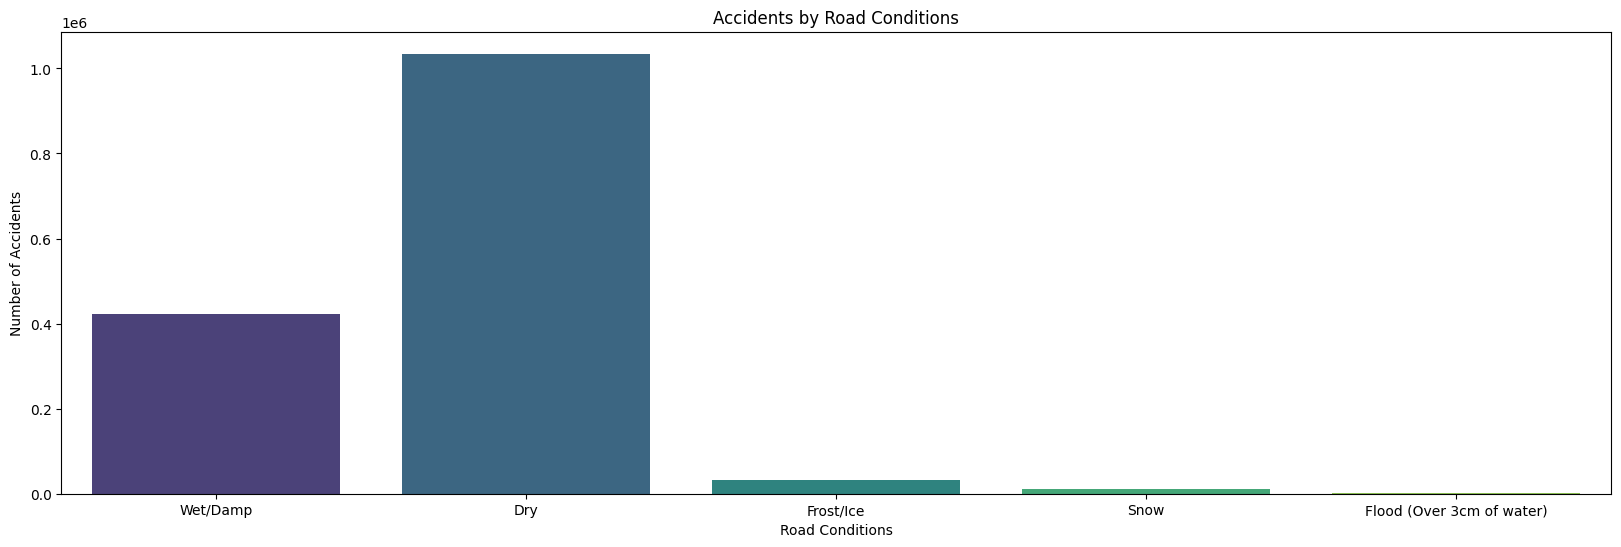

In [29]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Road_Surface_Conditions', data=accidents_data, palette='viridis')
plt.title('Accidents by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\2544770018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_Conditions', data=accidents_data, palette='magma')


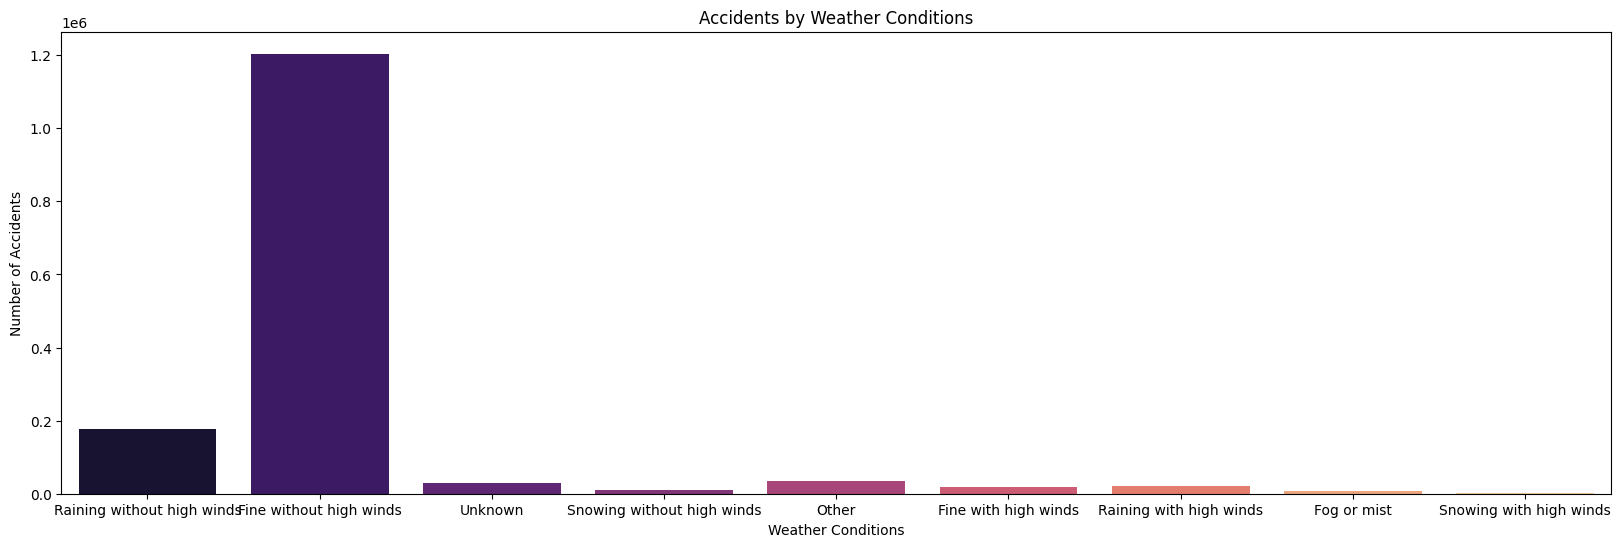

In [30]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Weather_Conditions', data=accidents_data, palette='magma')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

# Accident Hotspot Visualization (Using Latitude and Longitude)

In [31]:
geometry = [Point(xy) for xy in zip(accidents_data['Longitude'], accidents_data['Latitude'])]
accidents_gdf = gpd.GeoDataFrame(accidents_data, geometry=geometry)

c:\Users\athar\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


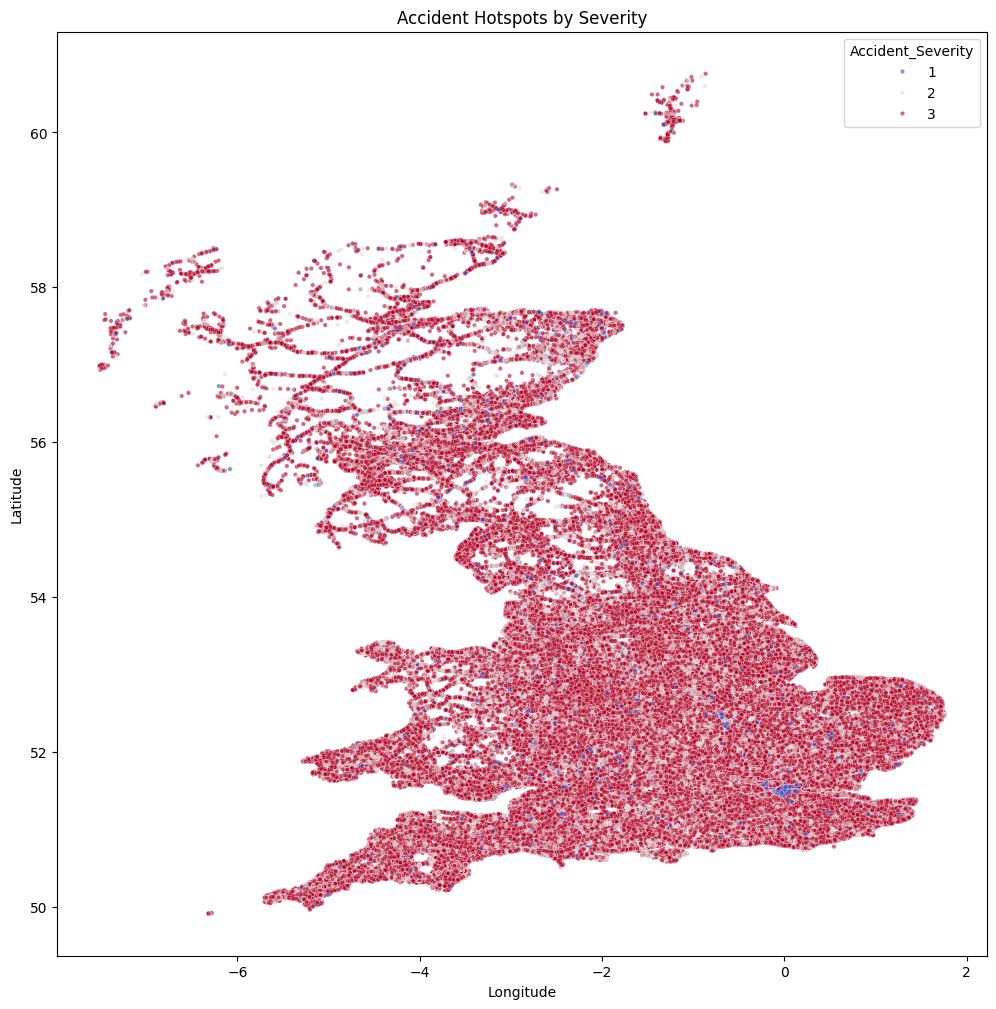

In [32]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Longitude', y='Latitude', data=accidents_data, hue='Accident_Severity', palette='coolwarm', alpha=0.6, s=10, legend = True)
plt.title('Accident Hotspots by Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Analyzing Contributing Factors (Road Condition vs Weather)

In [33]:
road_weather_crosstab = pd.crosstab(accidents_data['Road_Surface_Conditions'], accidents_data['Weather_Conditions'])

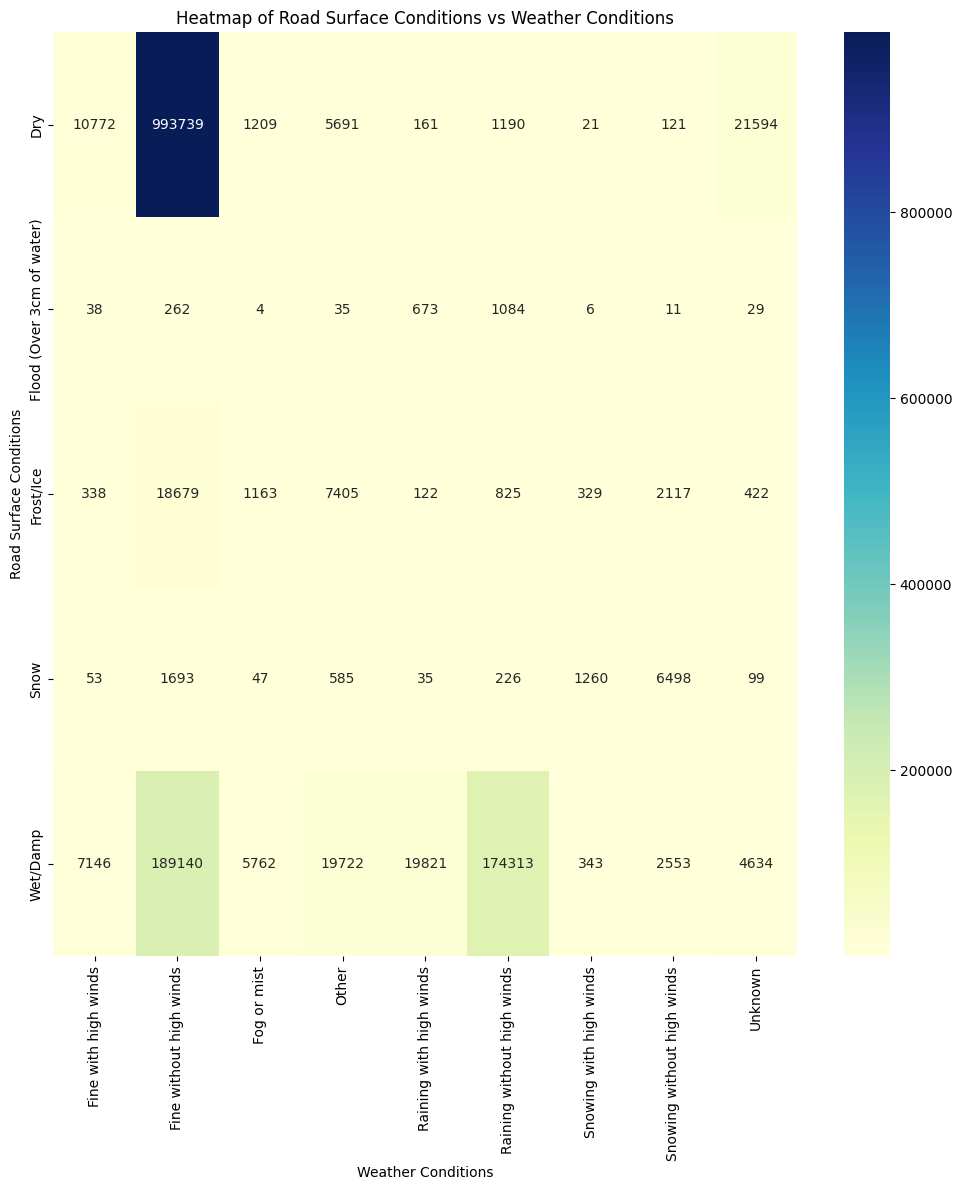

In [34]:
plt.figure(figsize=(12, 12))
sns.heatmap(road_weather_crosstab, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Road Surface Conditions vs Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Road Surface Conditions')
plt.show()

# Analyze Accident Trends Over Time (Yearly and Monthly Patterns)

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\2013299234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=accidents_data, palette='crest')


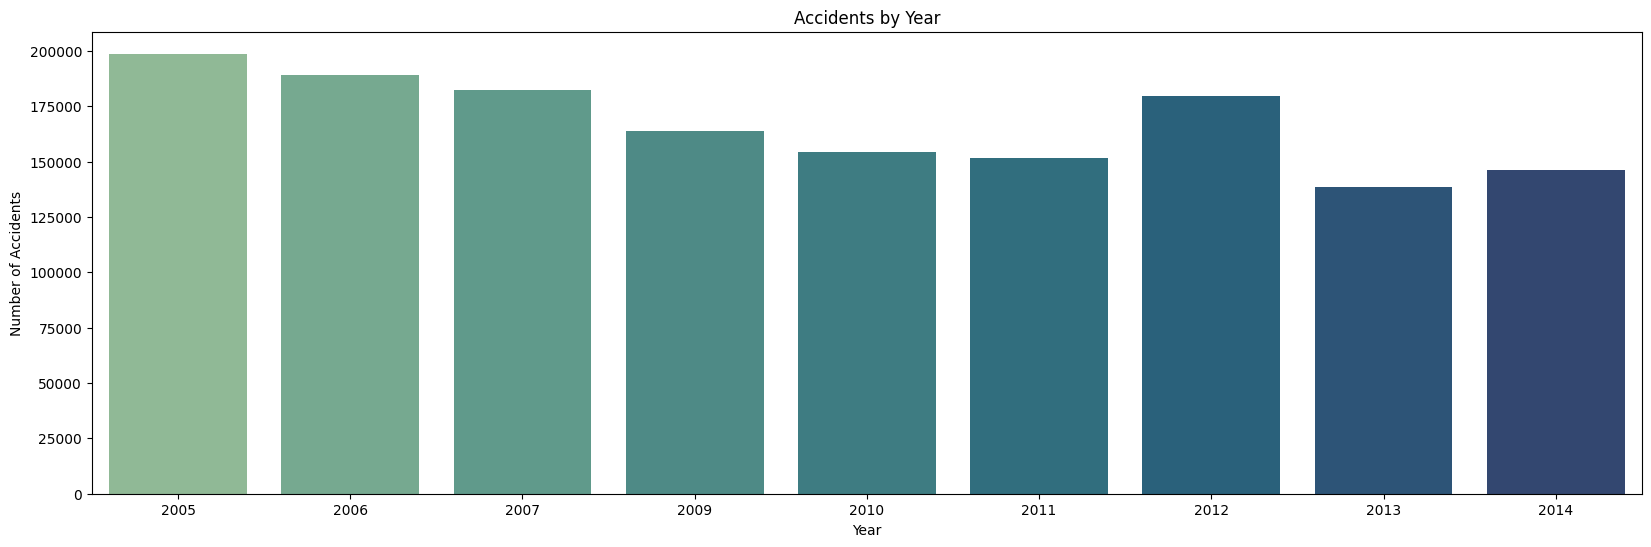

In [35]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Year', data=accidents_data, palette='crest')
plt.title('Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\1982618947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=accidents_data, palette='plasma')


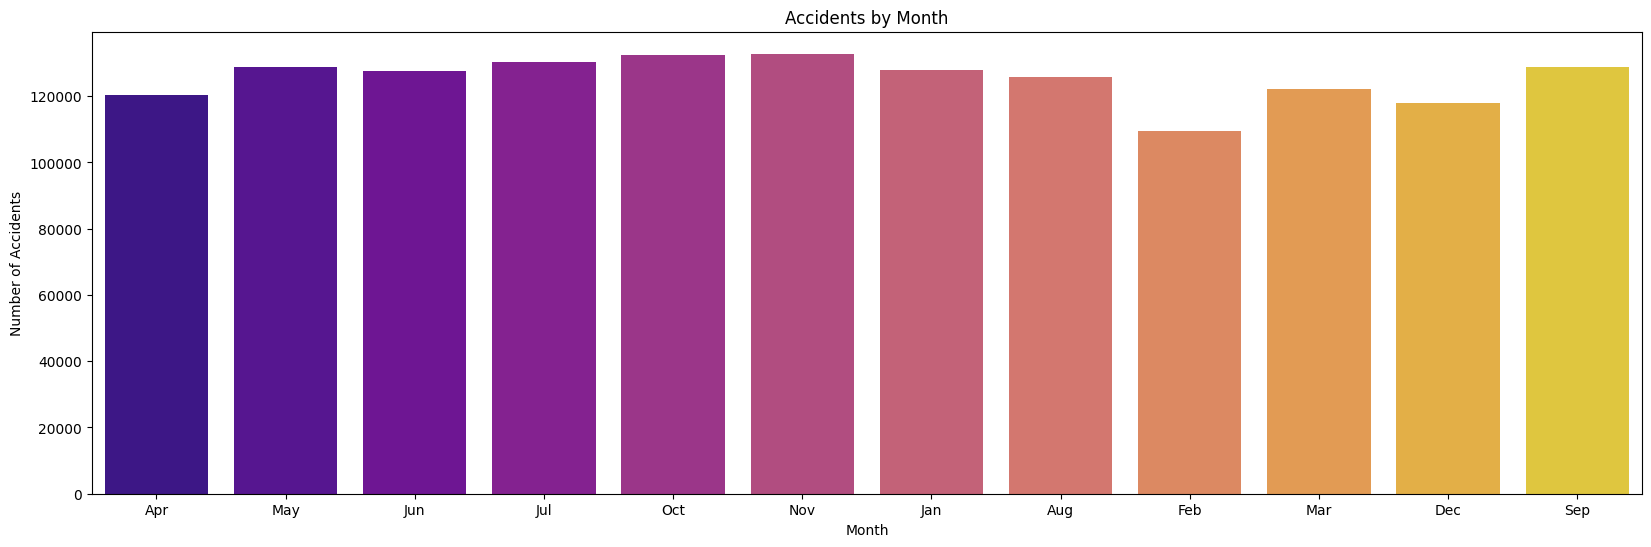

In [36]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Month', data=accidents_data, palette='plasma')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

# Analyze Severity Distribution of Accidents

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\3826930819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_Severity', data=accidents_data, palette='rocket')


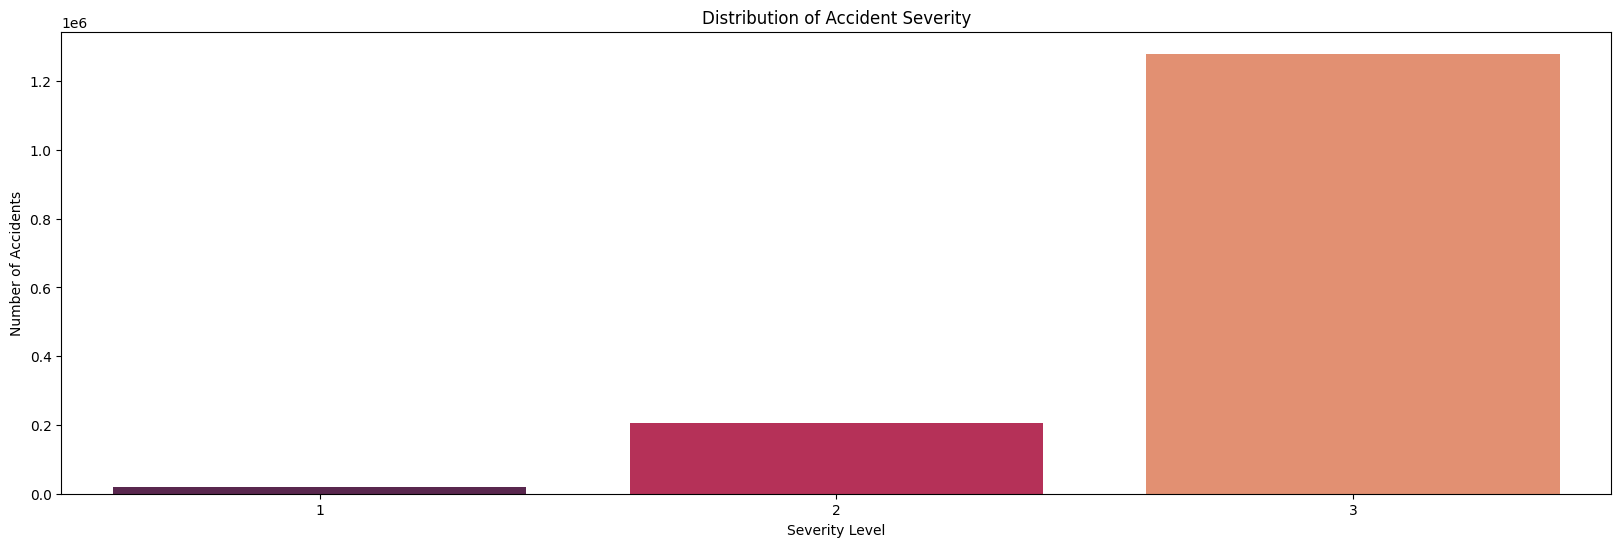

In [37]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Accident_Severity', data=accidents_data, palette='rocket')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\953249552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Accident_Severity', y='Hour', data=accidents_data, palette='vlag')


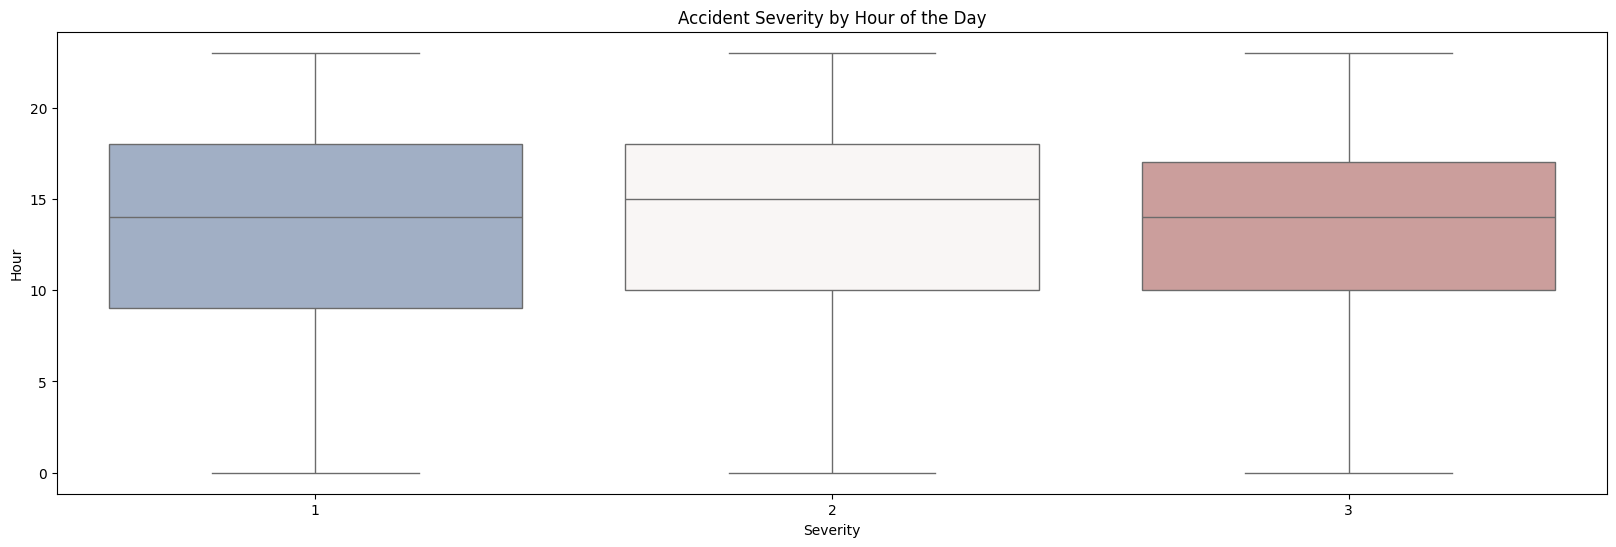

In [38]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Accident_Severity', y='Hour', data=accidents_data, palette='vlag')
plt.title('Accident Severity by Hour of the Day')
plt.xlabel('Severity')
plt.ylabel('Hour')
plt.show()

# Analyze Accidents by Days of the Week

In [39]:
accidents_data['Day_of_Week'] = accidents_data['Date'].dt.day_name()

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\2227903629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=accidents_data, palette='cividis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


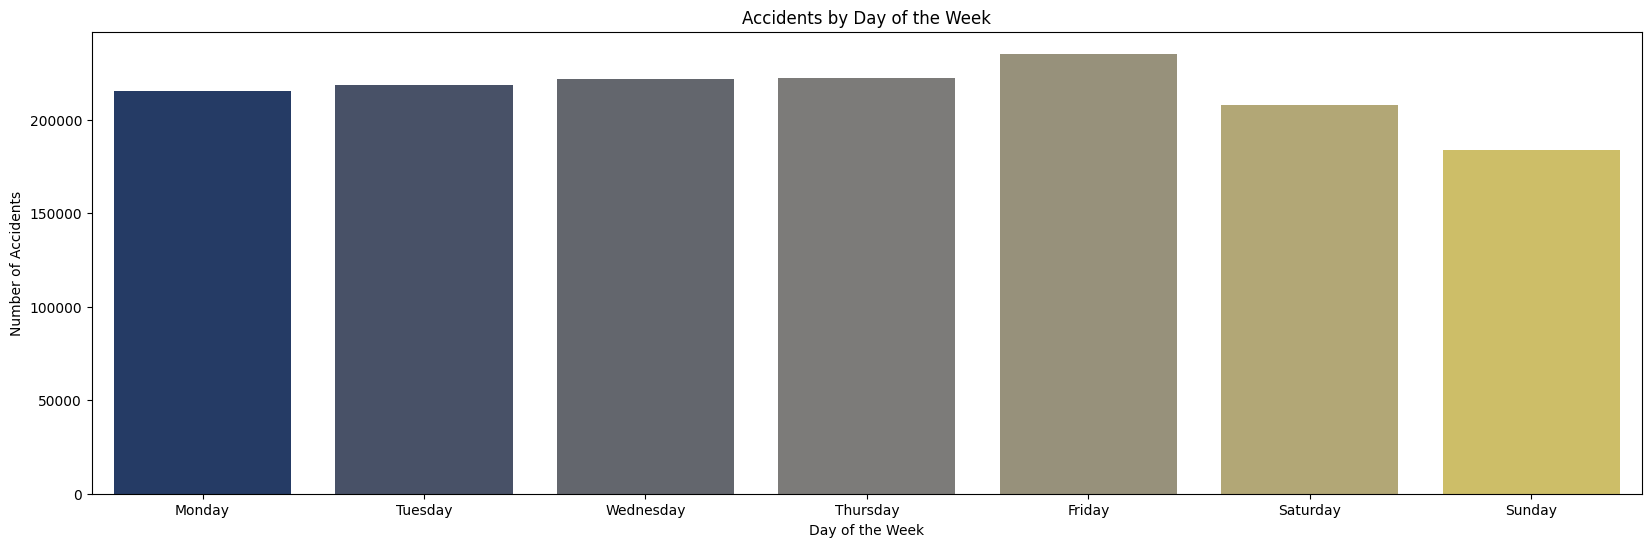

In [40]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Day_of_Week', data=accidents_data, palette='cividis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

# Accident Severity vs Time of Day (Heatmap)

In [41]:
severity_hour_pivot = accidents_data.pivot_table(index='Hour', columns='Accident_Severity', aggfunc='size', fill_value=0)

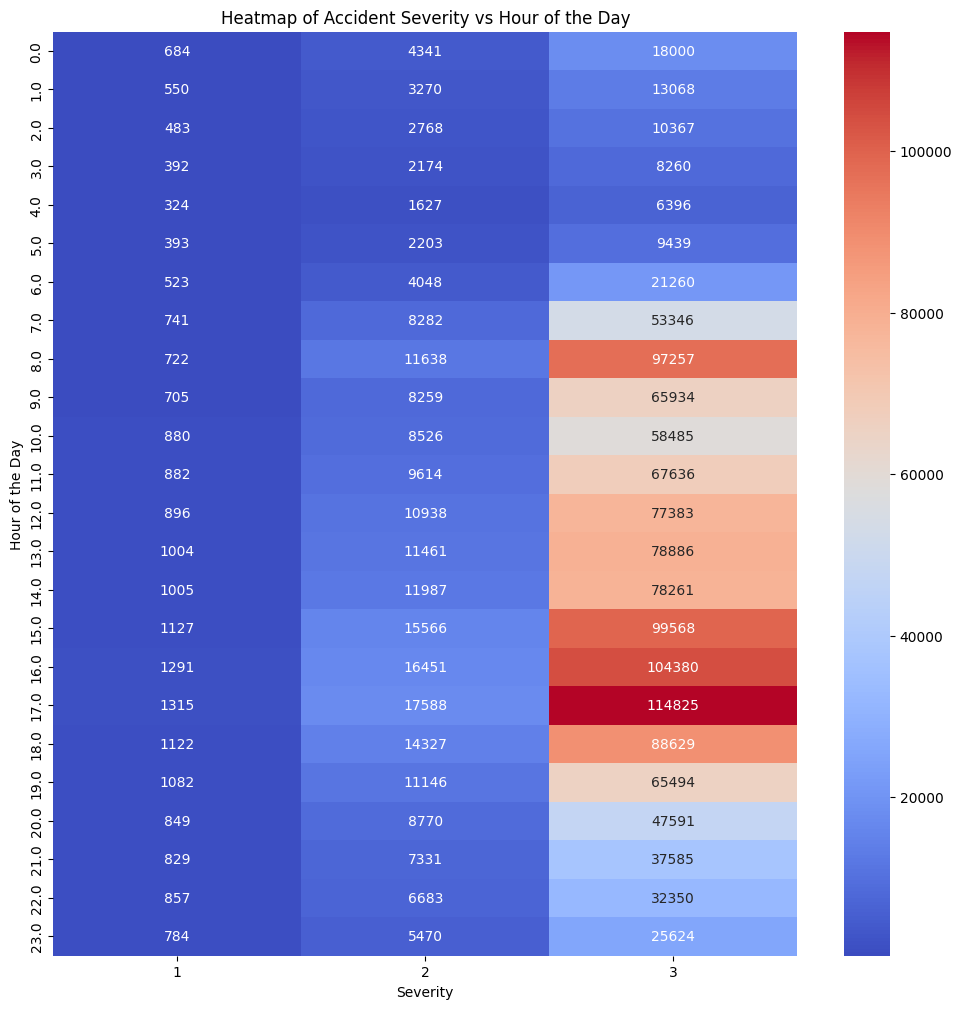

In [42]:
plt.figure(figsize=(12, 12))
sns.heatmap(severity_hour_pivot, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of Accident Severity vs Hour of the Day')
plt.xlabel('Severity')
plt.ylabel('Hour of the Day')
plt.show()

# Identify Accident-Prone Areas (Density Plot)

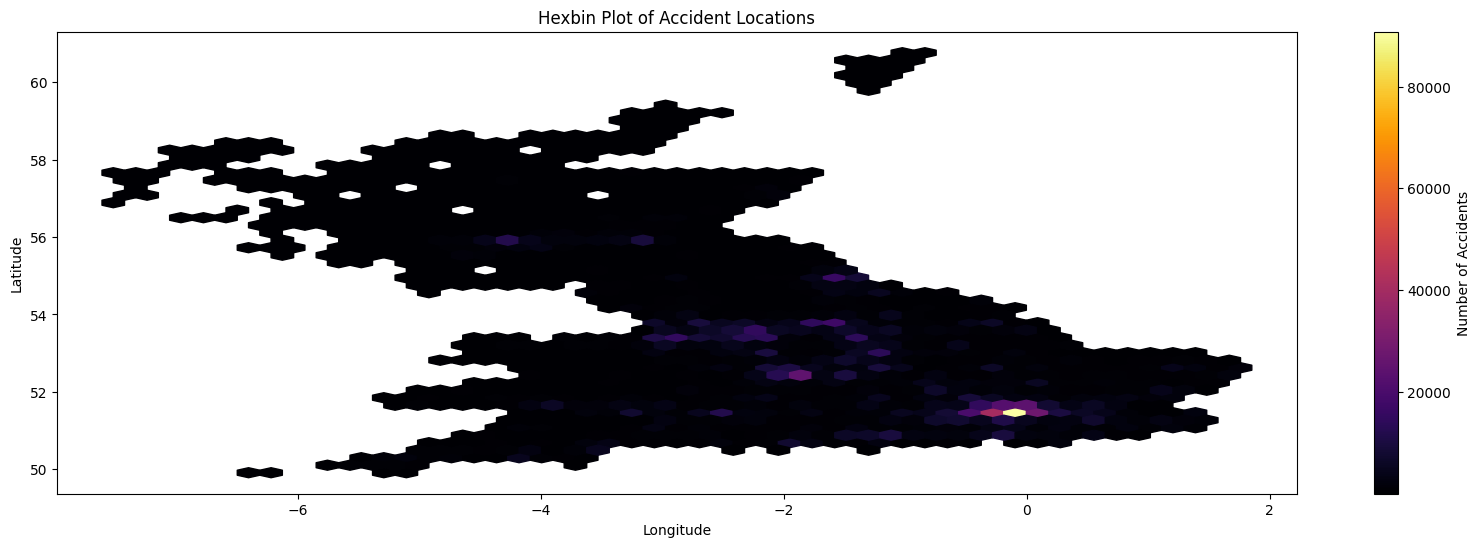

In [43]:
plt.figure(figsize=(20, 6))
plt.hexbin(accidents_data['Longitude'], accidents_data['Latitude'], gridsize=50, cmap='inferno', mincnt=1)
plt.colorbar(label='Number of Accidents')
plt.title('Hexbin Plot of Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Analyzing Impact of Light Conditions

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\1272169732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Light_Conditions', data=accidents_data, palette='Set2', legend = True)


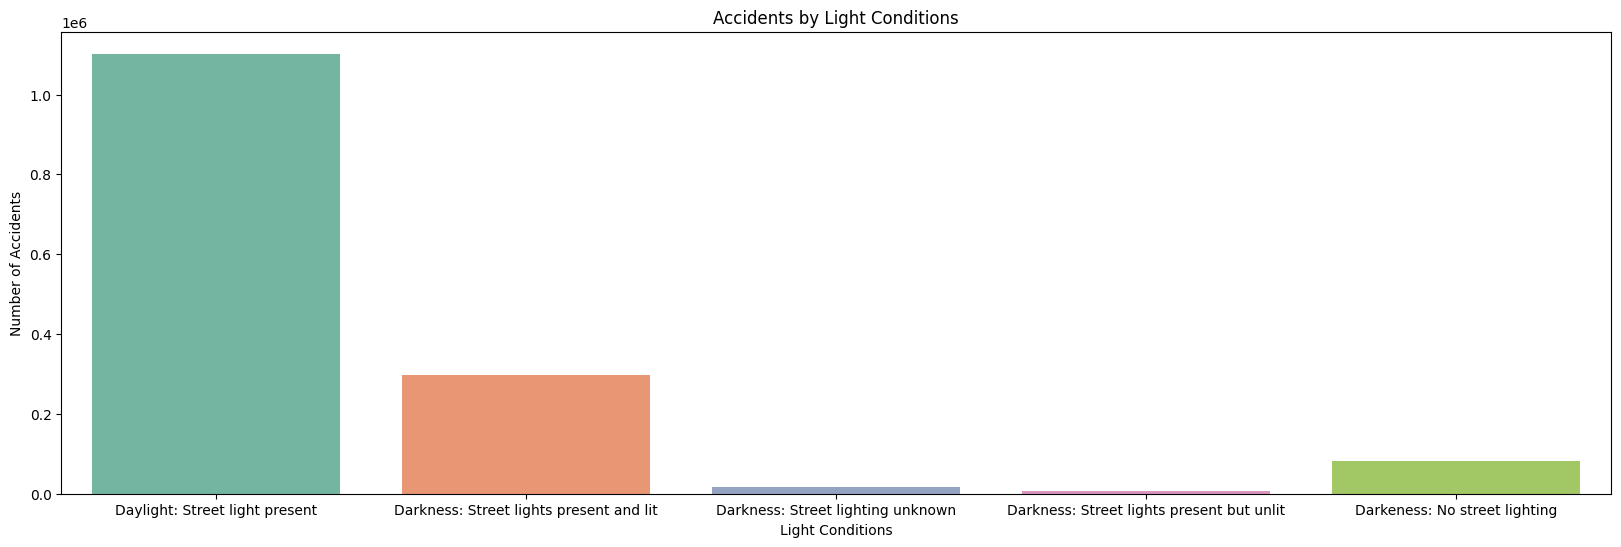

In [44]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Light_Conditions', data=accidents_data, palette='Set2', legend = True)
plt.title('Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

# Cluster Analysis of Accident Locations

In [45]:
coords = accidents_data[['Latitude', 'Longitude']].dropna()

In [46]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(coords)

In [47]:
accidents_data['Cluster'] = kmeans.labels_

In [48]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=accidents_data, palette='tab10', alpha=0.5, s=15, legend=True)
plt.title('Accident Hotspots - KMeans Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

c:\Users\athar\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


# Time Series Analysis of Accidents Trends

In [49]:
monthly_accidents = accidents_data.resample('M', on='Date').size()

C:\Users\athar\AppData\Local\Temp\ipykernel_8784\1028941145.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_accidents = accidents_data.resample('M', on='Date').size()


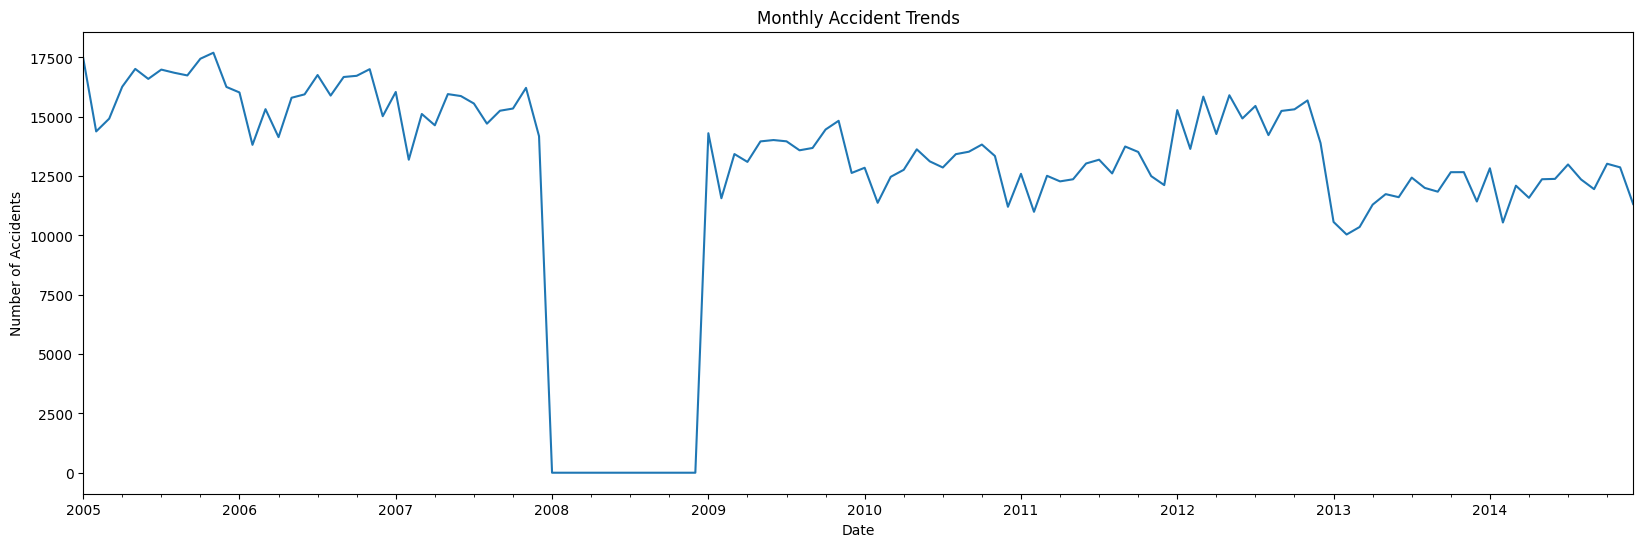

In [50]:
plt.figure(figsize=(20, 6))
monthly_accidents.plot()
plt.title('Monthly Accident Trends')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

In [51]:
rolling_avg = monthly_accidents.rolling(window=12).mean()

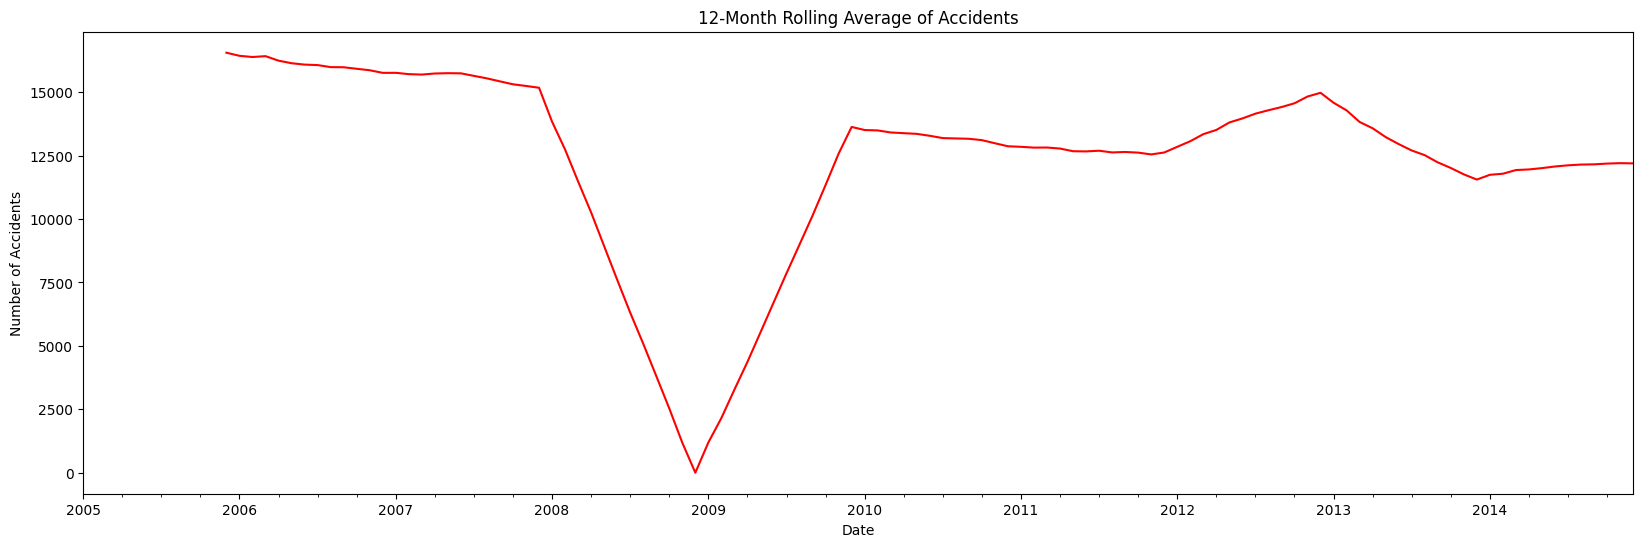

In [52]:
plt.figure(figsize=(20, 6))
rolling_avg.plot(color='r')
plt.title('12-Month Rolling Average of Accidents')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

# Seasonal Decomposition of Time Series

In [53]:
decomposition = seasonal_decompose(monthly_accidents, model='additive')

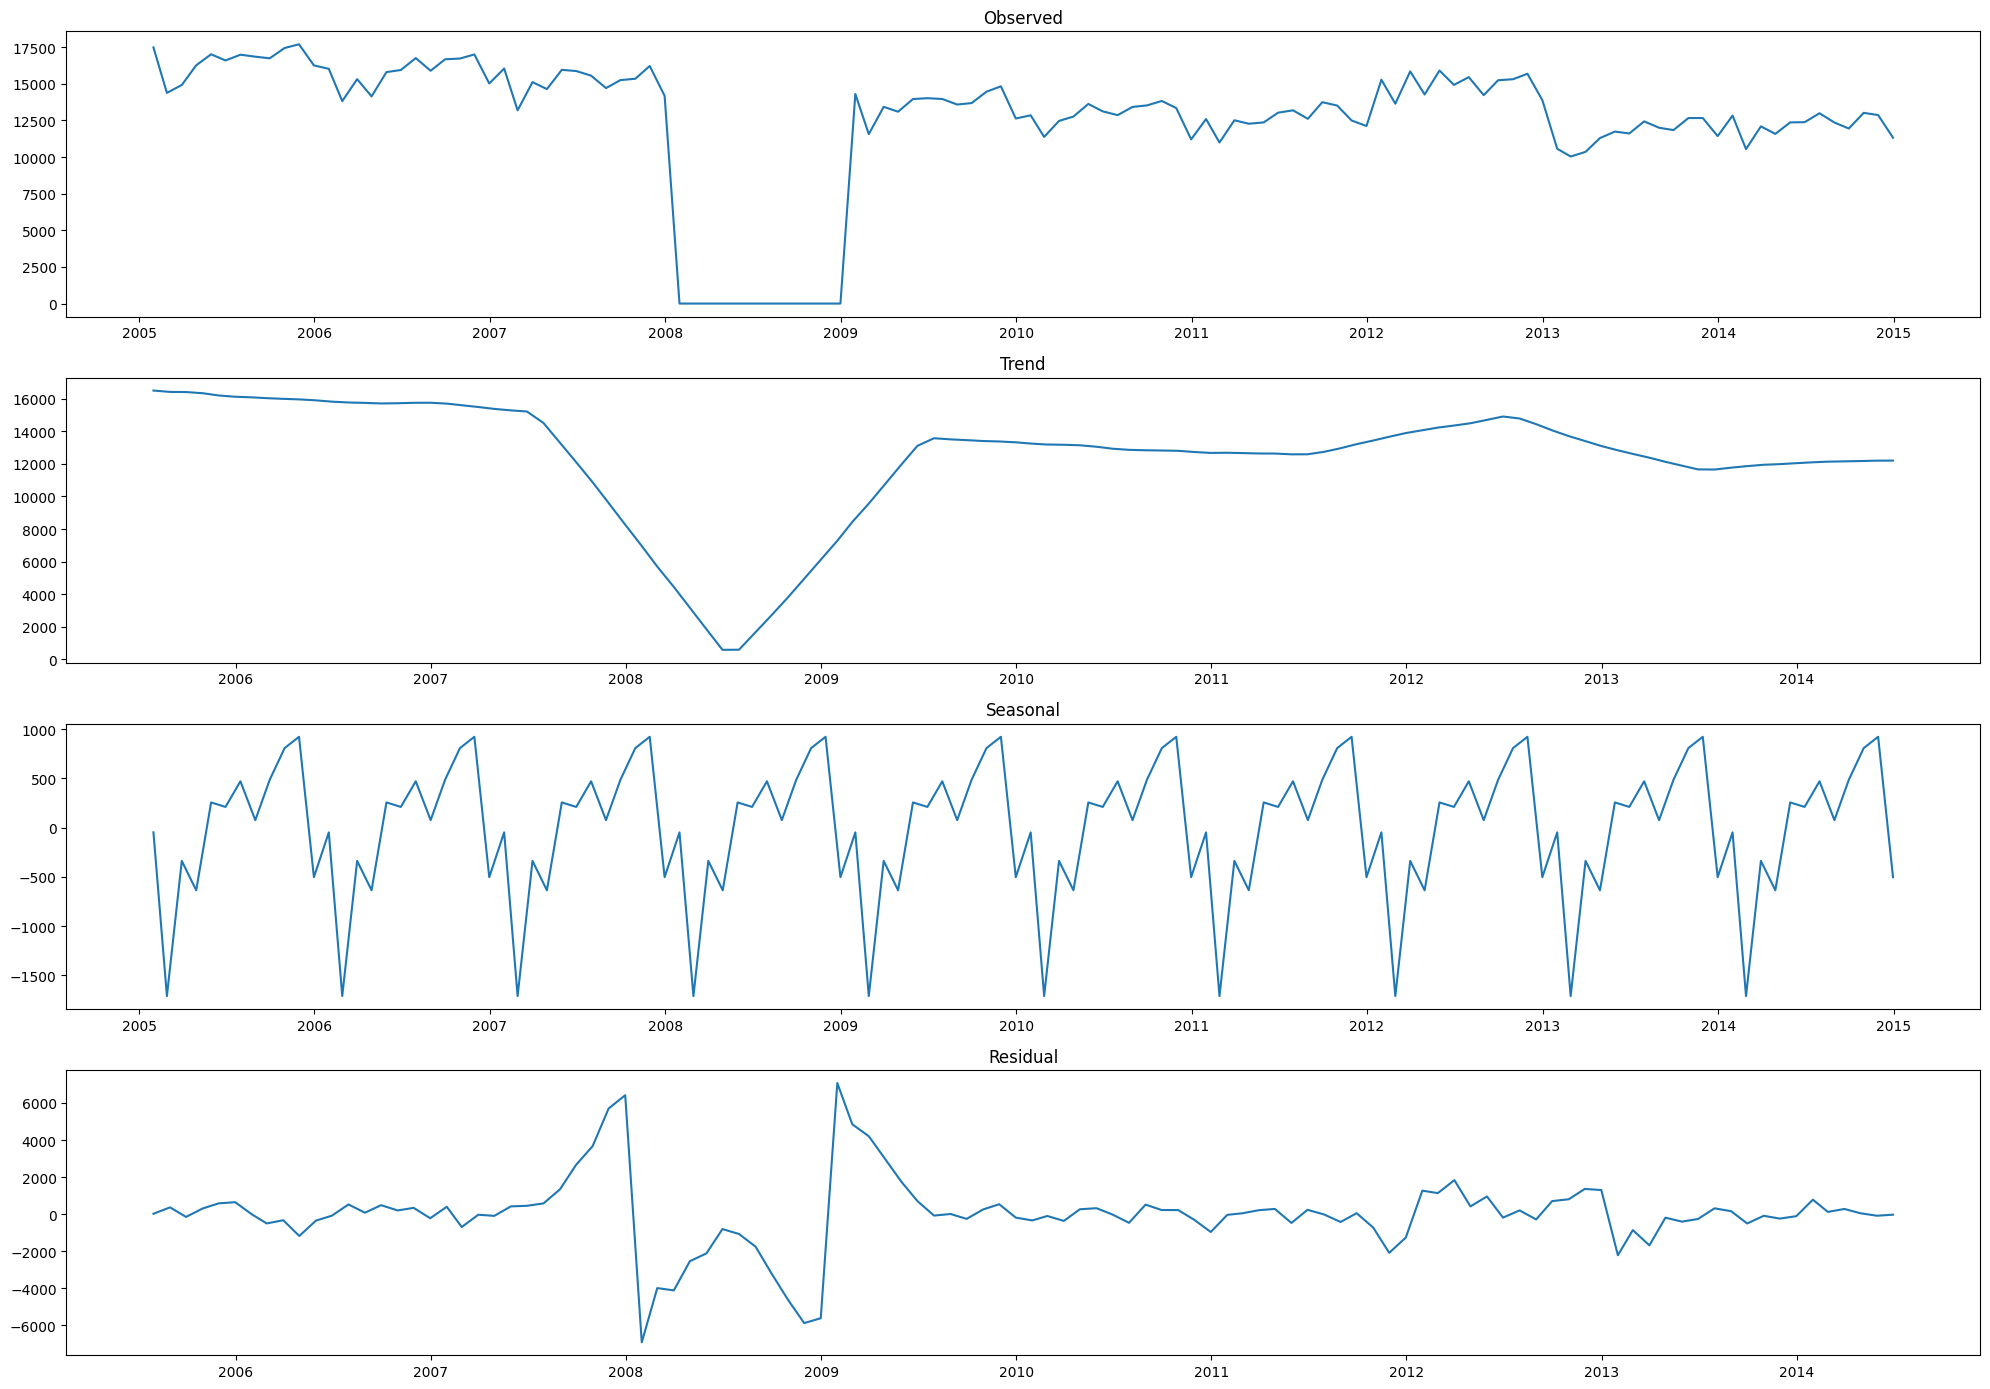

In [54]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
observed = decomposition.observed

fig, axes = plt.subplots(4, 1, figsize=(20, 14))

axes[0].plot(observed, label='Observed')
axes[0].set_title('Observed')
axes[1].plot(trend, label='Trend')
axes[1].set_title('Trend')
axes[2].plot(seasonal, label='Seasonal')
axes[2].set_title('Seasonal')
axes[3].plot(residual, label='Residual')
axes[3].set_title('Residual')
plt.tight_layout()
plt.show()

# Correlation Analysis of Contributing Factors

In [55]:
accidents_encoded = accidents_data.copy()
for col in ['Road_Surface_Conditions', 'Weather_Conditions', 'Light_Conditions', 'Day_of_Week']:
    accidents_encoded[col] = accidents_encoded[col].astype('category').cat.codes

In [56]:
correlation_matrix = accidents_encoded[['Accident_Severity', 'Road_Surface_Conditions', 'Weather_Conditions', 'Light_Conditions', 'Hour']].corr()

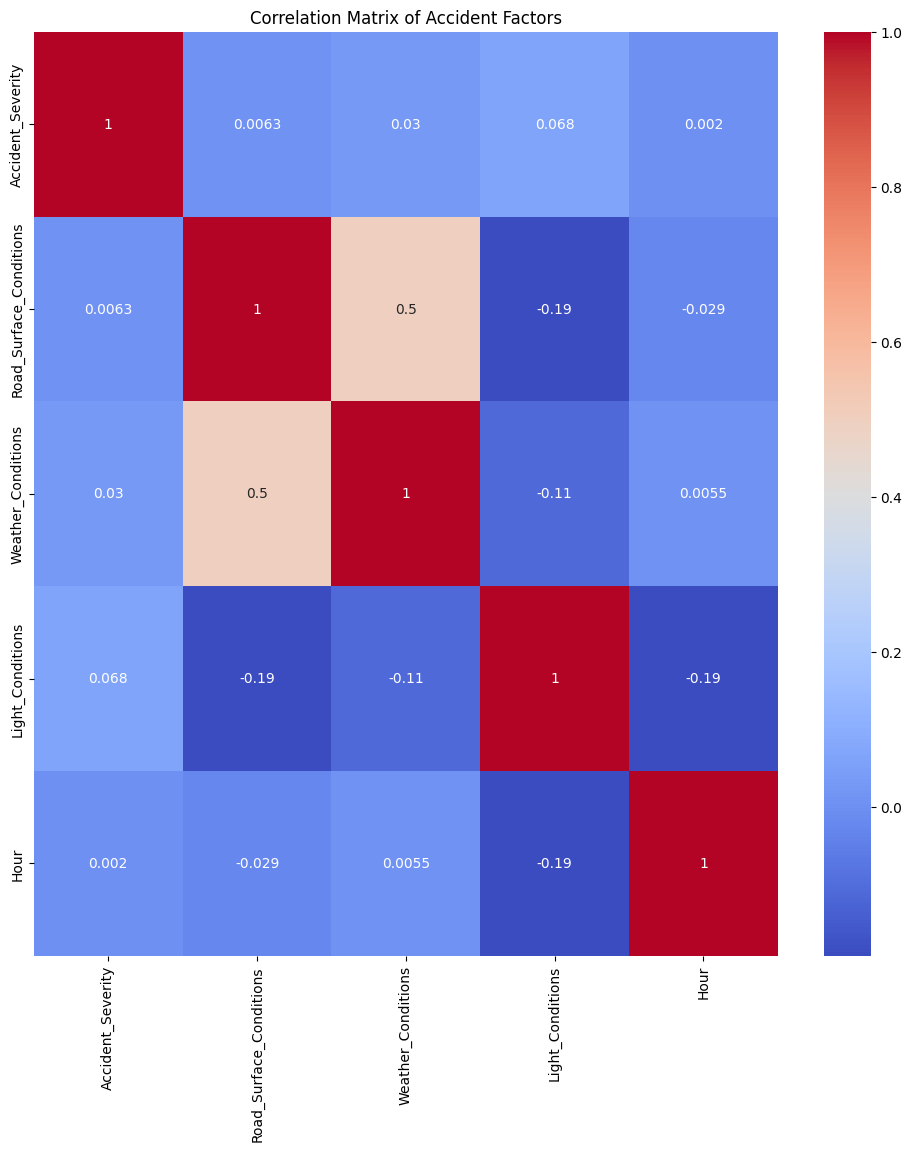

In [57]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Accident Factors')
plt.show()

# Interaction Effects between Multiple Factors (Interaction Plot)

In [58]:
num_trace_levels = accidents_data['Light_Conditions'].nunique()

In [59]:
markers = ['D', '^', 'o', 's', '*', '+'][:num_trace_levels]

In [60]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink'][:num_trace_levels]

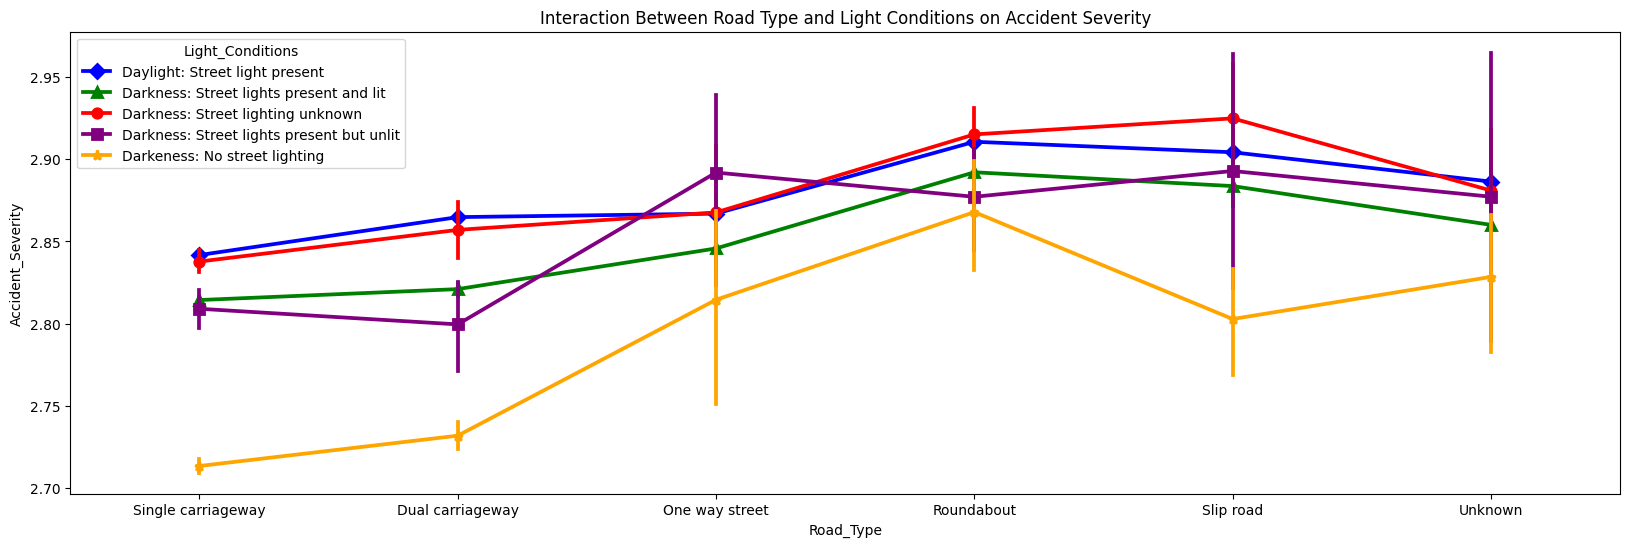

In [61]:
ad = accidents_data[['Road_Type', 'Light_Conditions', 'Accident_Severity']]
plt.figure(figsize=(20, 6))
sns.pointplot(x='Road_Type', y='Accident_Severity', hue='Light_Conditions', data=ad, markers=markers, palette=colors, legend=True)
plt.title('Interaction Between Road Type and Light Conditions on Accident Severity')
plt.show()

# Plotting Map using Folium

In [62]:
x_mean = accidents_data.Latitude.mean()
y_mean = accidents_data.Longitude.mean()

In [63]:
accidents_data[['Latitude','Longitude']].min().tolist()

[49.912941, -7.516225]

In [64]:
df_min = accidents_data[['Latitude','Longitude']].min().tolist()
df_max = accidents_data[['Latitude','Longitude']].max().tolist()

df_x_min = accidents_data[accidents_data['Latitude'] == df_min[0]][['Latitude','Longitude']].to_records()[0]
df_x_min = [df_x_min[1], df_x_min[2]]

df_y_min = accidents_data[accidents_data['Longitude'] == df_min[1]][['Latitude','Longitude']].to_records()[0]
df_y_min = [df_y_min[1], df_y_min[2]]


df_x_max = accidents_data[accidents_data['Latitude'] == df_max[0]][['Latitude','Longitude']].to_records()[0]
df_x_max = [df_x_max[1], df_x_max[2]]

df_y_max = accidents_data[accidents_data['Longitude'] == df_max[1]][['Latitude','Longitude']].to_records()[0]
df_y_max = [df_y_max[1], df_y_max[2]]

In [65]:
map_hooray = folium.Map(location=[x_mean,y_mean], zoom_start = 4.3)
folium.Marker(df_x_min, popup='Min X').add_to(map_hooray)
folium.Marker(df_y_min, popup='Min Y').add_to(map_hooray)
folium.Marker(df_x_max, popup='Max X').add_to(map_hooray)
folium.Marker(df_y_max, popup='Max Y').add_to(map_hooray)

rec = [df_x_min,df_y_min,df_x_max,df_y_max]
folium.Polygon(rec, color = "blue", weight = .1, fill = True, fill_color = "orange", fill_opacity = 0.2).add_to(map_hooray)
map_hooray 

In [66]:
most_crashes = accidents_data[['Latitude','Longitude']].value_counts().head(1000)
most_crashes_df = most_crashes.reset_index(name='Accidents')
max_accidents = most_crashes_df['Accidents'].max()  

map = folium.Map(location=[x_mean, y_mean], zoom_start=7)

for index, row in most_crashes_df.iterrows():
    point = [row['Latitude'], row['Longitude']]  
    radius_val = ((row['Accidents'] / max_accidents) ** 2) * 6  

    folium.CircleMarker(point, radius = radius_val, color = "blue", weight = row['Accidents'] / max_accidents, fill = True, fill_color = "red", fill_opacity = 1, popup = f'{row["Accidents"]} Accidents Occurred').add_to(map)
map  